In [1]:
import os
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# まずは馬戦績データ読み込み

In [690]:
table_dir = '/Users/eee/python/jra_ml/data/table'
target_file = 'horse_result.csv'
table_path = os.path.join(table_dir, target_file)

usecols = ['horse_id', '日付', '開催', '天気', 'R', 'レース名', '頭数', '枠番', '馬番', 'オッズ', '人気', '着順', '騎手', '斤量', '距離', '馬場', 'タイム', '着差', '馬体重', '勝ち馬(2着馬)']
df = pd.read_csv(table_path, usecols=usecols)
df.head()

,horse_id,日付,開催,天気,R,レース名,頭数,枠番,馬番,オッズ,人気,着順,騎手,斤量,距離,馬場,タイム,着差,馬体重,勝ち馬(2着馬)
0,2020105571,2022/09/24,4中山6,曇,9.0,カンナS(OP),10.0,3.0,3.0,12.9,5.0,3,丹内祐次,54.0,芝1200,重,1:09.7,0.3,466(+2),ウメムスビ
1,2020105571,2022/09/03,2札幌7,晴,1.0,2歳未勝利,14.0,7.0,12.0,1.9,1.0,1,丹内祐次,54.0,芝1200,良,1:10.7,-0.5,464(-2),(コパカバーナビーチ)
2,2020105571,2022/08/27,2札幌5,曇,2.0,2歳未勝利,8.0,4.0,4.0,2.2,1.0,2,丹内祐次,54.0,芝1200,良,1:10.5,0.1,466(+2),バロットボックス
3,2020105571,2022/08/06,1札幌5,晴,5.0,2歳新馬,8.0,3.0,3.0,21.9,5.0,5,丹内祐次,54.0,芝1200,良,1:10.9,0.8,464(0),メイクアスナッチ
4,2020101863,2022/09/25,4中山7,晴,2.0,2歳未勝利,16.0,8.0,15.0,6.6,3.0,5,黛弘人,54.0,芝1200,稍,1:10.0,0.6,420(-2),クリノゴッホ


# 欠損行を削除

In [691]:
df.isnull().sum()

horse_id         0
日付               0
開催               0
天気            6988
R             1963
レース名            16
頭数             528
枠番            2697
馬番              16
オッズ         257320
人気           24780
着順            8961
騎手             217
斤量             251
距離              16
馬場            4882
タイム          34939
着差           36356
馬体重             16
勝ち馬(2着馬)     10416
dtype: int64

In [692]:
df = df.dropna(subset=['着順', '頭数', '騎手'])
df = df[df['着順'] != '失']
df = df[df['着順'] != '取']
df = df[df['着順'] != '中']
df = df[df['着順'] != '除']
df = df[df['頭数'] != 0]

df.head()

,horse_id,日付,開催,天気,R,レース名,頭数,枠番,馬番,オッズ,人気,着順,騎手,斤量,距離,馬場,タイム,着差,馬体重,勝ち馬(2着馬)
0,2020105571,2022/09/24,4中山6,曇,9.0,カンナS(OP),10.0,3.0,3.0,12.9,5.0,3,丹内祐次,54.0,芝1200,重,1:09.7,0.3,466(+2),ウメムスビ
1,2020105571,2022/09/03,2札幌7,晴,1.0,2歳未勝利,14.0,7.0,12.0,1.9,1.0,1,丹内祐次,54.0,芝1200,良,1:10.7,-0.5,464(-2),(コパカバーナビーチ)
2,2020105571,2022/08/27,2札幌5,曇,2.0,2歳未勝利,8.0,4.0,4.0,2.2,1.0,2,丹内祐次,54.0,芝1200,良,1:10.5,0.1,466(+2),バロットボックス
3,2020105571,2022/08/06,1札幌5,晴,5.0,2歳新馬,8.0,3.0,3.0,21.9,5.0,5,丹内祐次,54.0,芝1200,良,1:10.9,0.8,464(0),メイクアスナッチ
4,2020101863,2022/09/25,4中山7,晴,2.0,2歳未勝利,16.0,8.0,15.0,6.6,3.0,5,黛弘人,54.0,芝1200,稍,1:10.0,0.6,420(-2),クリノゴッホ


In [693]:
df.isnull().sum()

horse_id         0
日付               0
開催               0
天気            1601
R             1340
レース名             0
頭数               0
枠番            2058
馬番               0
オッズ         231163
人気            1180
着順               0
騎手               0
斤量              22
距離               0
馬場              12
タイム            496
着差            1375
馬体重              0
勝ち馬(2着馬)       972
dtype: int64

# 中央、地方レースの比率確認

## 中央、地方それぞれでデータを用意する

In [694]:
place_urban = ['札幌', '函館', '福島', '新潟', '東京', '中山', '中京', '京都', '阪神', '小倉']
place_rural = ['帯広', '門別', '盛岡', '水沢', '浦和', '船橋', '大井', '川崎', '金沢', '笠松', '名古屋', '園田', '姫路', '高知', '佐賀']
place_all = place_urban + place_rural

df['レース場'] = df['開催']
for p in place_all:
    df['レース場'] = df['レース場'].where(~df['レース場'].str.contains(p), p)
del_target = df.index[~df['レース場'].isin(place_all)]
df = df.drop(del_target)
df.head()

,horse_id,日付,開催,天気,R,レース名,頭数,枠番,馬番,オッズ,...,着順,騎手,斤量,距離,馬場,タイム,着差,馬体重,勝ち馬(2着馬),レース場
0,2020105571,2022/09/24,4中山6,曇,9.0,カンナS(OP),10.0,3.0,3.0,12.9,...,3,丹内祐次,54.0,芝1200,重,1:09.7,0.3,466(+2),ウメムスビ,中山
1,2020105571,2022/09/03,2札幌7,晴,1.0,2歳未勝利,14.0,7.0,12.0,1.9,...,1,丹内祐次,54.0,芝1200,良,1:10.7,-0.5,464(-2),(コパカバーナビーチ),札幌
2,2020105571,2022/08/27,2札幌5,曇,2.0,2歳未勝利,8.0,4.0,4.0,2.2,...,2,丹内祐次,54.0,芝1200,良,1:10.5,0.1,466(+2),バロットボックス,札幌
3,2020105571,2022/08/06,1札幌5,晴,5.0,2歳新馬,8.0,3.0,3.0,21.9,...,5,丹内祐次,54.0,芝1200,良,1:10.9,0.8,464(0),メイクアスナッチ,札幌
4,2020101863,2022/09/25,4中山7,晴,2.0,2歳未勝利,16.0,8.0,15.0,6.6,...,5,黛弘人,54.0,芝1200,稍,1:10.0,0.6,420(-2),クリノゴッホ,中山


## 各レース場のヒストグラムをプロット

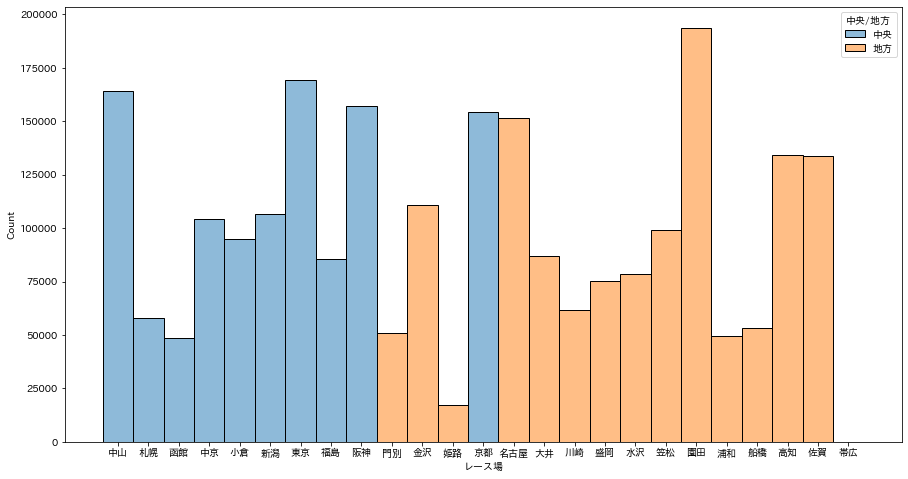

In [695]:
df['中央/地方'] = df['レース場'].isin(place_urban)
df['中央/地方'] = df['中央/地方'].where(~df['レース場'].isin(place_urban), '中央')
df['中央/地方'] = df['中央/地方'].where(df['レース場'].isin(place_urban), '地方')

plt.figure(figsize=(15, 8))
ax = sns.histplot(df[['レース場', '中央/地方']], x=df['レース場'], hue='中央/地方')

In [696]:
df['中央/地方'].value_counts()

地方    1296387
中央    1142626
Name: 中央/地方, dtype: int64

## 中央/地方の戦績数を頭数ごとにプロットしてみる

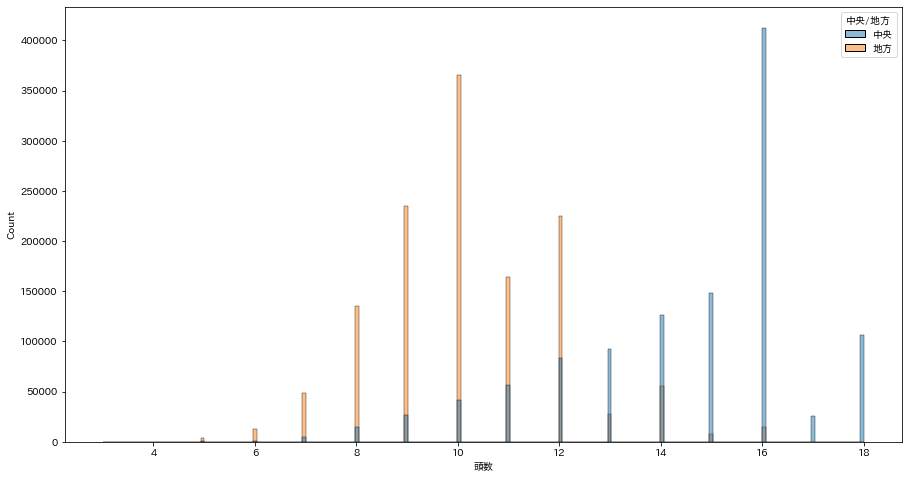

In [697]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(df[['頭数', '中央/地方']], x=df['頭数'], hue='中央/地方')

- 中央は地方に比べ馬戦績数が160,000データほど少ないが、中央は1レースあたりの頭数が多い分複勝予測の価値は中央の方が高いため、予定通り中央レースに特化したモデル作成を目指す。

## 頭数で割って、概算レース数をプロットしてみる

In [698]:
temp_urban = df
temp_urban = temp_urban[temp_urban['中央/地方'] == '中央']
count_urban = temp_urban.groupby('頭数').count()
count_urban.reset_index(inplace=True)

num_race_urban = pd.DataFrame(columns=['頭数', 'num_race', '中央/地方'])
num_race_urban['頭数'] = count_urban['頭数']
num_race_urban['num_race'] = count_urban['horse_id'] / count_urban['頭数']
num_race_urban['中央/地方'] = '中央'

In [699]:
temp_rural = df
temp_rural = temp_rural[temp_rural['中央/地方'] == '地方']
count_rural = temp_rural.groupby('頭数').count()
count_rural.reset_index(inplace=True)

num_race_rural = pd.DataFrame(columns=['頭数', 'num_race'])
num_race_rural['頭数'] = count_rural['頭数']
num_race_rural['num_race'] = count_rural['horse_id'] / count_rural['頭数']
num_race_rural['中央/地方'] = '地方'

In [700]:
num_race = pd.concat([num_race_urban, num_race_rural], axis=0)
#num_race.columns=['頭数', 'num_race_urban'
num_race

,頭数,num_race,中央/地方
0,4.0,6.000000,中央
1,5.0,62.600000,中央
2,6.0,215.000000,中央
3,7.0,699.142857,中央
4,8.0,1849.500000,中央
5,9.0,2983.777778,中央
6,10.0,4158.300000,中央
7,11.0,5128.000000,中央
8,12.0,6999.916667,中央
9,13.0,7094.000000,中央


<AxesSubplot:xlabel='頭数', ylabel='num_race'>

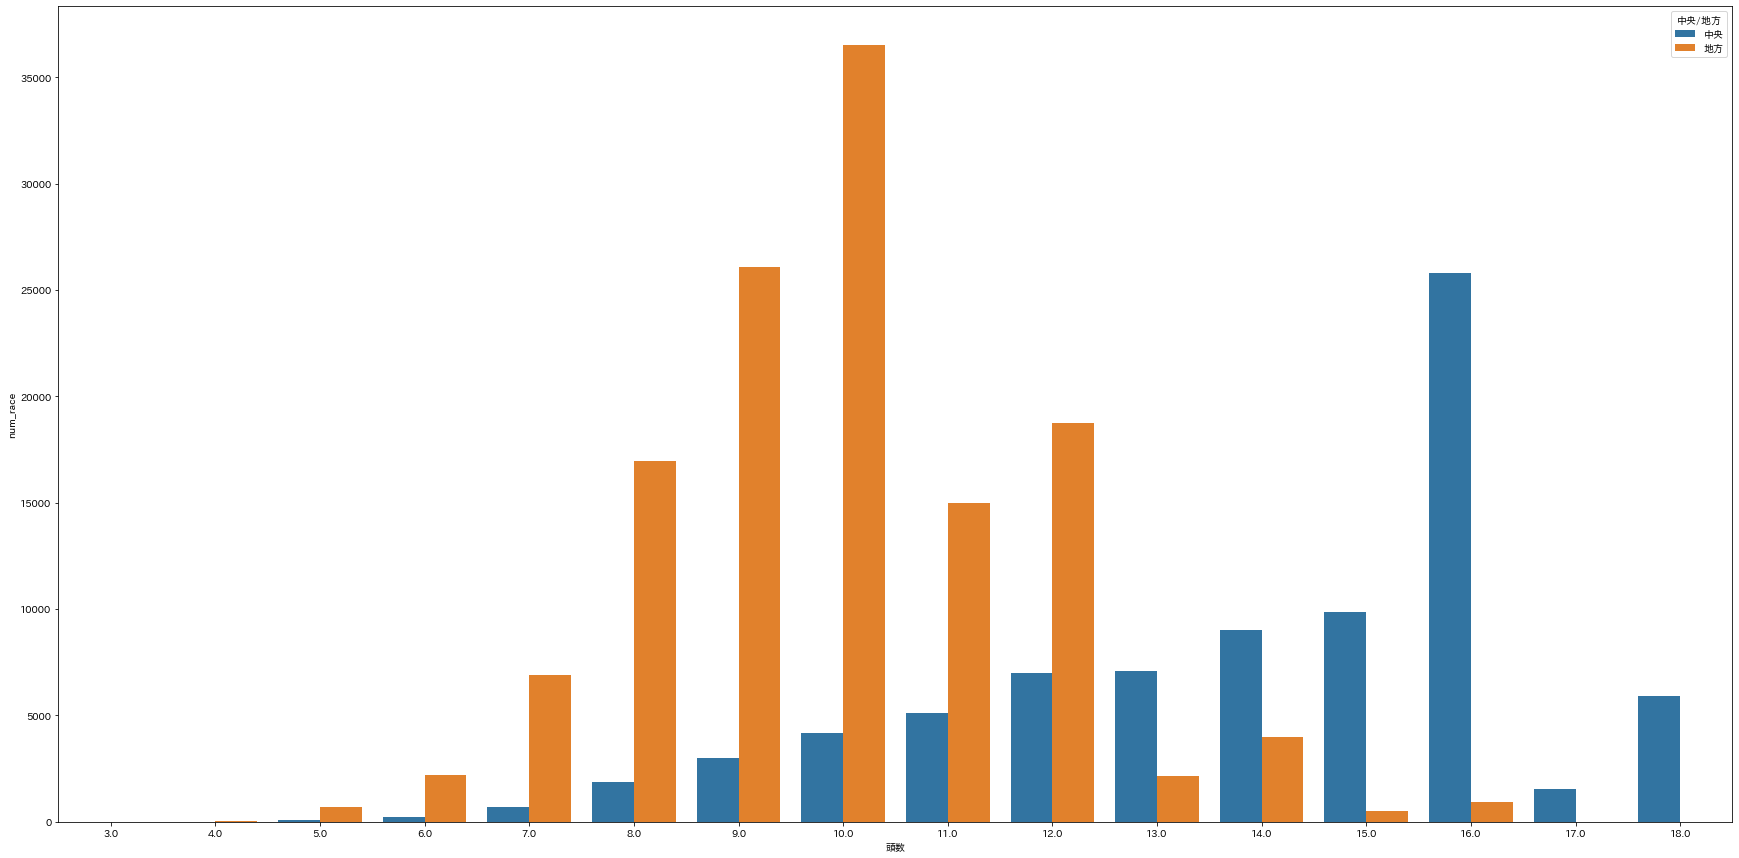

In [701]:
num_race.groupby('頭数')
plt.figure(figsize=(30, 15))
sns.barplot(data=num_race, x='頭数', y='num_race', hue='中央/地方')

#sns.barplot(x=num_race['頭数']+1, y=num_race['num_race_rural'])

In [702]:
print('中央レース数: ', int(num_race_urban['num_race'].sum())) 
print('地方レース数: ', int(num_race_rural['num_race'].sum()))

中央レース数:  81372
地方レース数:  130640


- レース数は圧倒的に地方の方が多いですね。

# 中央/地方のレース特徴を分析する


## 中央/地方にデータを分割する

In [703]:
df_urban = df[df['中央/地方']=='中央']
df_rural = df[df['中央/地方']=='地方']
print(df['中央/地方'].value_counts())

地方    1296387
中央    1142626
Name: 中央/地方, dtype: int64


- レース数は地方>中央、平均頭数は地方<中央
- 馬戦績数は160000ほど差がある

## 芝/ダート比率を確認する

### ひとまず【距離】列で全体感を確認する

<AxesSubplot:xlabel='距離', ylabel='Count'>

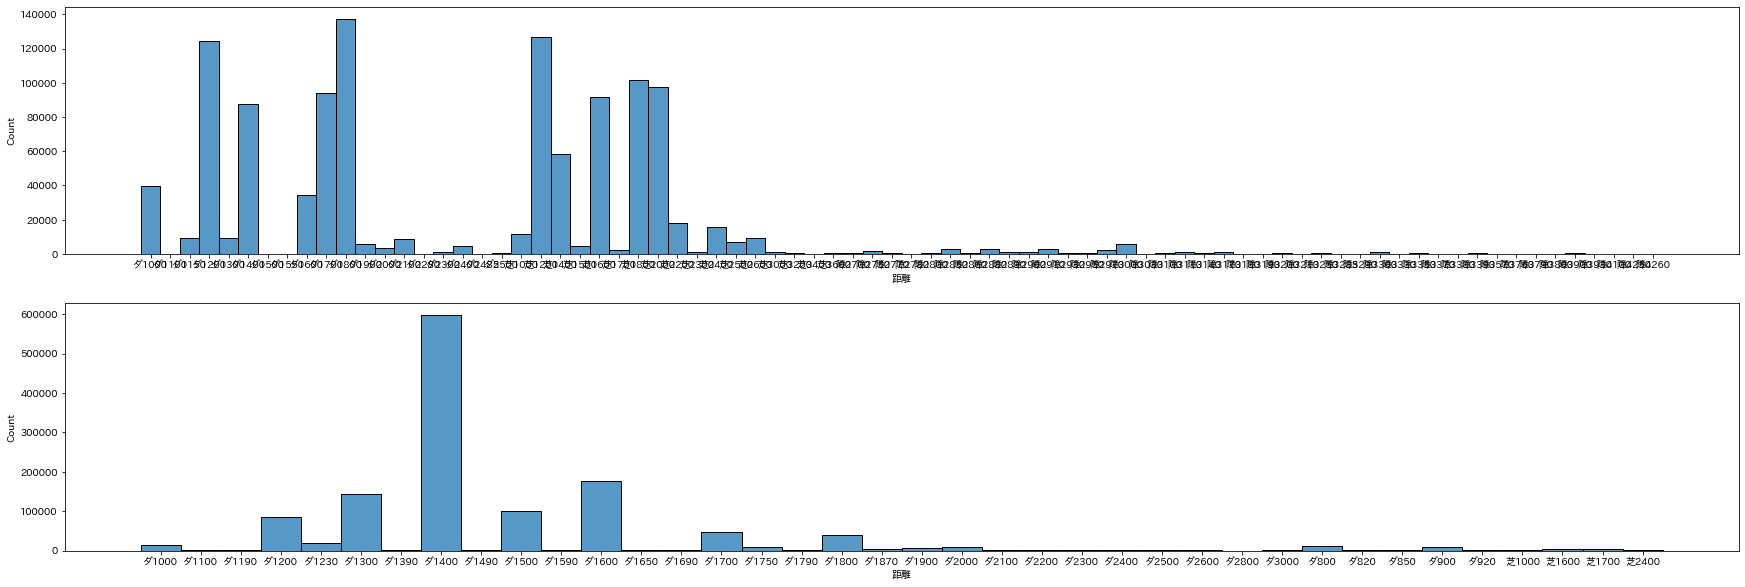

In [704]:
fig, ax = plt.subplots(2, 1, figsize=(30,10))
sns.histplot(df_urban['距離'].sort_values(), ax=ax[0])
sns.histplot(df_rural['距離'].sort_values(), ax=ax[1])

- 中央レース：芝/ダート/障害の3種があるので、ひとまず障害レースは削除する
- 地方レース:芝/ダートの2種のみ

In [705]:
print('中央データ数: ', df_urban.shape)
print('地方データ数: ', df_rural.shape)

中央データ数:  (1142626, 22)
地方データ数:  (1296387, 22)


In [706]:
df_urban = df_urban[~df_urban['距離'].str.contains('障')]
df = df[~df['距離'].str.contains('障')]

In [707]:
print('中央データ数: ', df_urban.shape)
print('地方データ数: ', df_rural.shape)

中央データ数:  (1108855, 22)
地方データ数:  (1296387, 22)


### 障害レースを除外した後のレース数を確認する

In [708]:
print('中央レース数: ', int(num_race_urban['num_race'].sum())) 
print('地方レース数: ', int(num_race_rural['num_race'].sum()))

中央レース数:  81372
地方レース数:  130640


In [709]:
temp_urban = df_urban
temp_urban = temp_urban[temp_urban['中央/地方'] == '中央']
count_urban = temp_urban.groupby('頭数').count()
count_urban.reset_index(inplace=True)

num_race_urban = pd.DataFrame(columns=['頭数', 'num_race', '中央/地方'])
num_race_urban['頭数'] = count_urban['頭数']
num_race_urban['num_race'] = count_urban['horse_id'] / count_urban['頭数']
num_race_urban['中央/地方'] = '中央'

In [710]:
print('中央レース数: ', int(num_race_urban['num_race'].sum())) 
print('地方レース数: ', int(num_race_rural['num_race'].sum()))

中央レース数:  78688
地方レース数:  130640


- 障害レース: 2700レースほど。

### 障害レースを除外し、距離を改めてプロット

<AxesSubplot:xlabel='距離', ylabel='Count'>

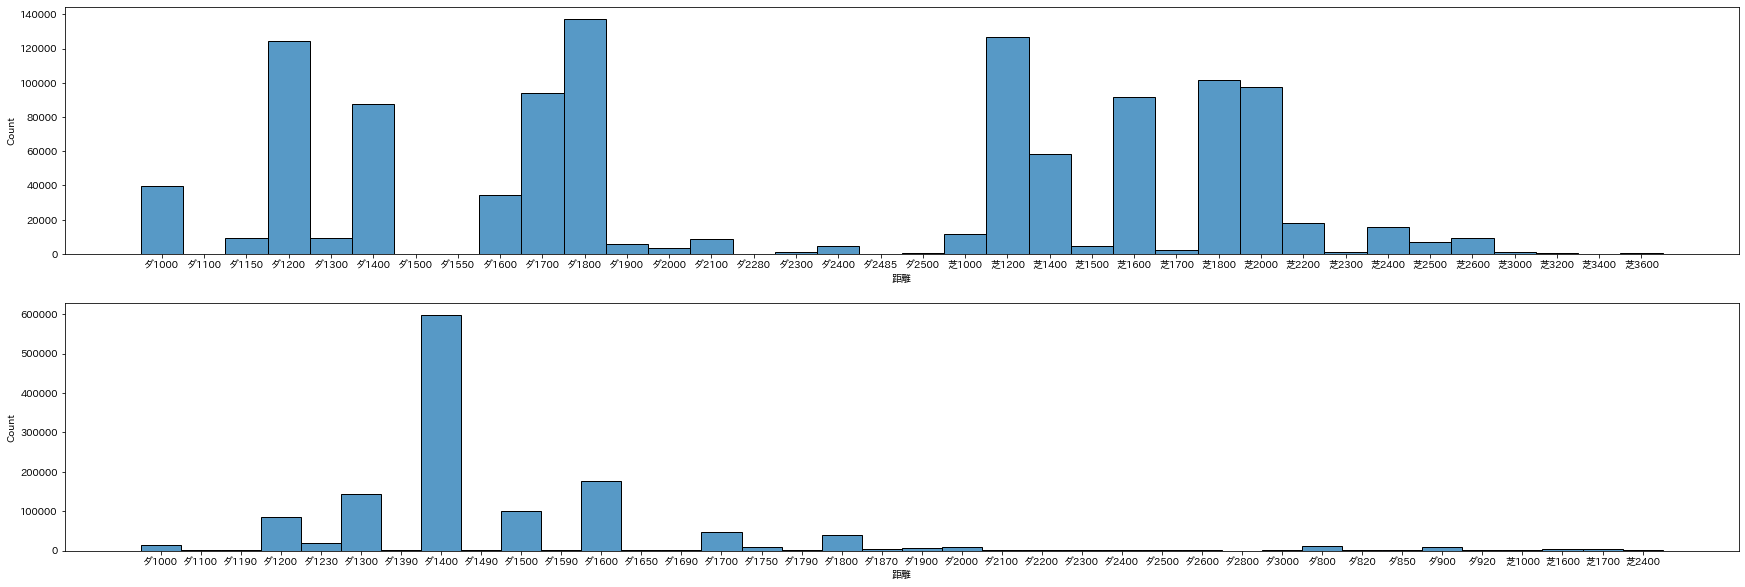

In [711]:
fig, ax = plt.subplots(2, 1, figsize=(30,10))
sns.histplot(df_urban['距離'].sort_values(), ax=ax[0])
sns.histplot(df_rural['距離'].sort_values(), ax=ax[1])

- 距離としては、地方と比較して中央の方が長いレースが多い。

### 芝/ダート列の追加、及び距離列の変更をする

In [712]:
print(df_urban['距離'].unique())
print(df_rural['距離'].unique())

['芝1200' '芝1500' '芝1000' '芝1400' '芝1800' '芝1600' 'ダ1000' '芝2000' 'ダ1200'
 'ダ1800' 'ダ1700' 'ダ1400' 'ダ1600' '芝2400' 'ダ1900' 'ダ2100' 'ダ1300' '芝2600'
 '芝2200' 'ダ1150' 'ダ2400' 'ダ2000' '芝2500' '芝2300' '芝3600' '芝3400' '芝3000'
 'ダ2500' '芝3200' '芝1700' 'ダ2300' 'ダ2485' 'ダ1550' 'ダ1500' 'ダ1100' 'ダ2280']
['ダ1200' 'ダ1500' 'ダ1400' 'ダ1800' 'ダ1000' 'ダ1600' 'ダ2000' '芝1700' 'ダ1300'
 'ダ1700' 'ダ1230' 'ダ820' 'ダ800' 'ダ2200' 'ダ1870' 'ダ1900' 'ダ2100' 'ダ1100'
 '芝1000' 'ダ920' '芝1600' 'ダ900' 'ダ1750' 'ダ2400' 'ダ2500' 'ダ2600' '芝2400'
 'ダ850' 'ダ1650' 'ダ2300' 'ダ3000' 'ダ1590' 'ダ1490' 'ダ1390' 'ダ1790' 'ダ1690'
 'ダ1190' 'ダ2800']


In [713]:
df['temp'] = df['距離'].str.contains('芝')
df['芝/ダート'] = df['temp'].replace({False: 'ダート', True: '芝'})
del df['temp']

ダート    561618
芝      547237
Name: 芝/ダート, dtype: int64
ダート    1287959
芝         8428
Name: 芝/ダート, dtype: int64


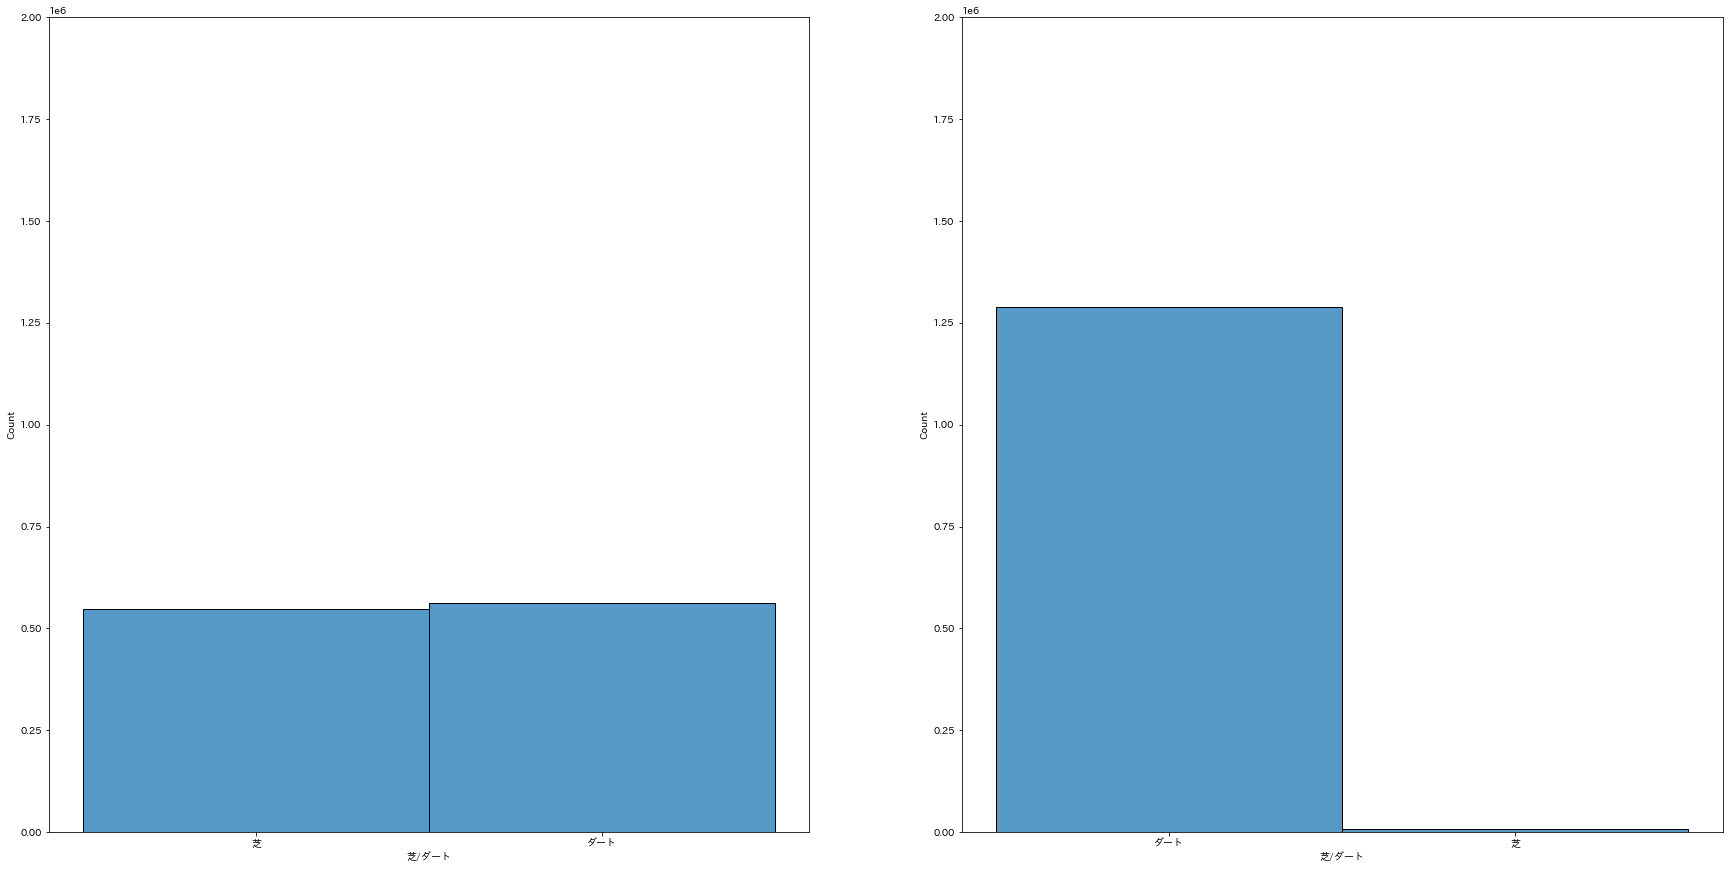

In [714]:
df_urban['temp'] = df_urban['距離'].str.contains('芝')
df_urban['芝/ダート'] = df_urban['temp'].replace({False: 'ダート', True: '芝'})
del df_urban['temp']

df_rural['temp'] = df_rural['距離'].str.contains('芝')
df_rural['芝/ダート'] = df_rural['temp'].replace({False: 'ダート', True: '芝'})
del df_rural['temp']

fig, ax = plt.subplots(1, 2, figsize=(30, 15))
sns.histplot(df_urban['芝/ダート'], ax=ax[0])
ax[0].set(ylim=(0, 2e6))
sns.histplot(df_rural['芝/ダート'], ax=ax[1])
ax[1].set(ylim=(0, 2e6))

print(df_urban['芝/ダート'].value_counts())
print(df_rural['芝/ダート'].value_counts())

## 中央/地方それぞれの距離のヒストグラムを確認してみる

(1108855, 23)
(1296387, 23)
(2405242, 23)


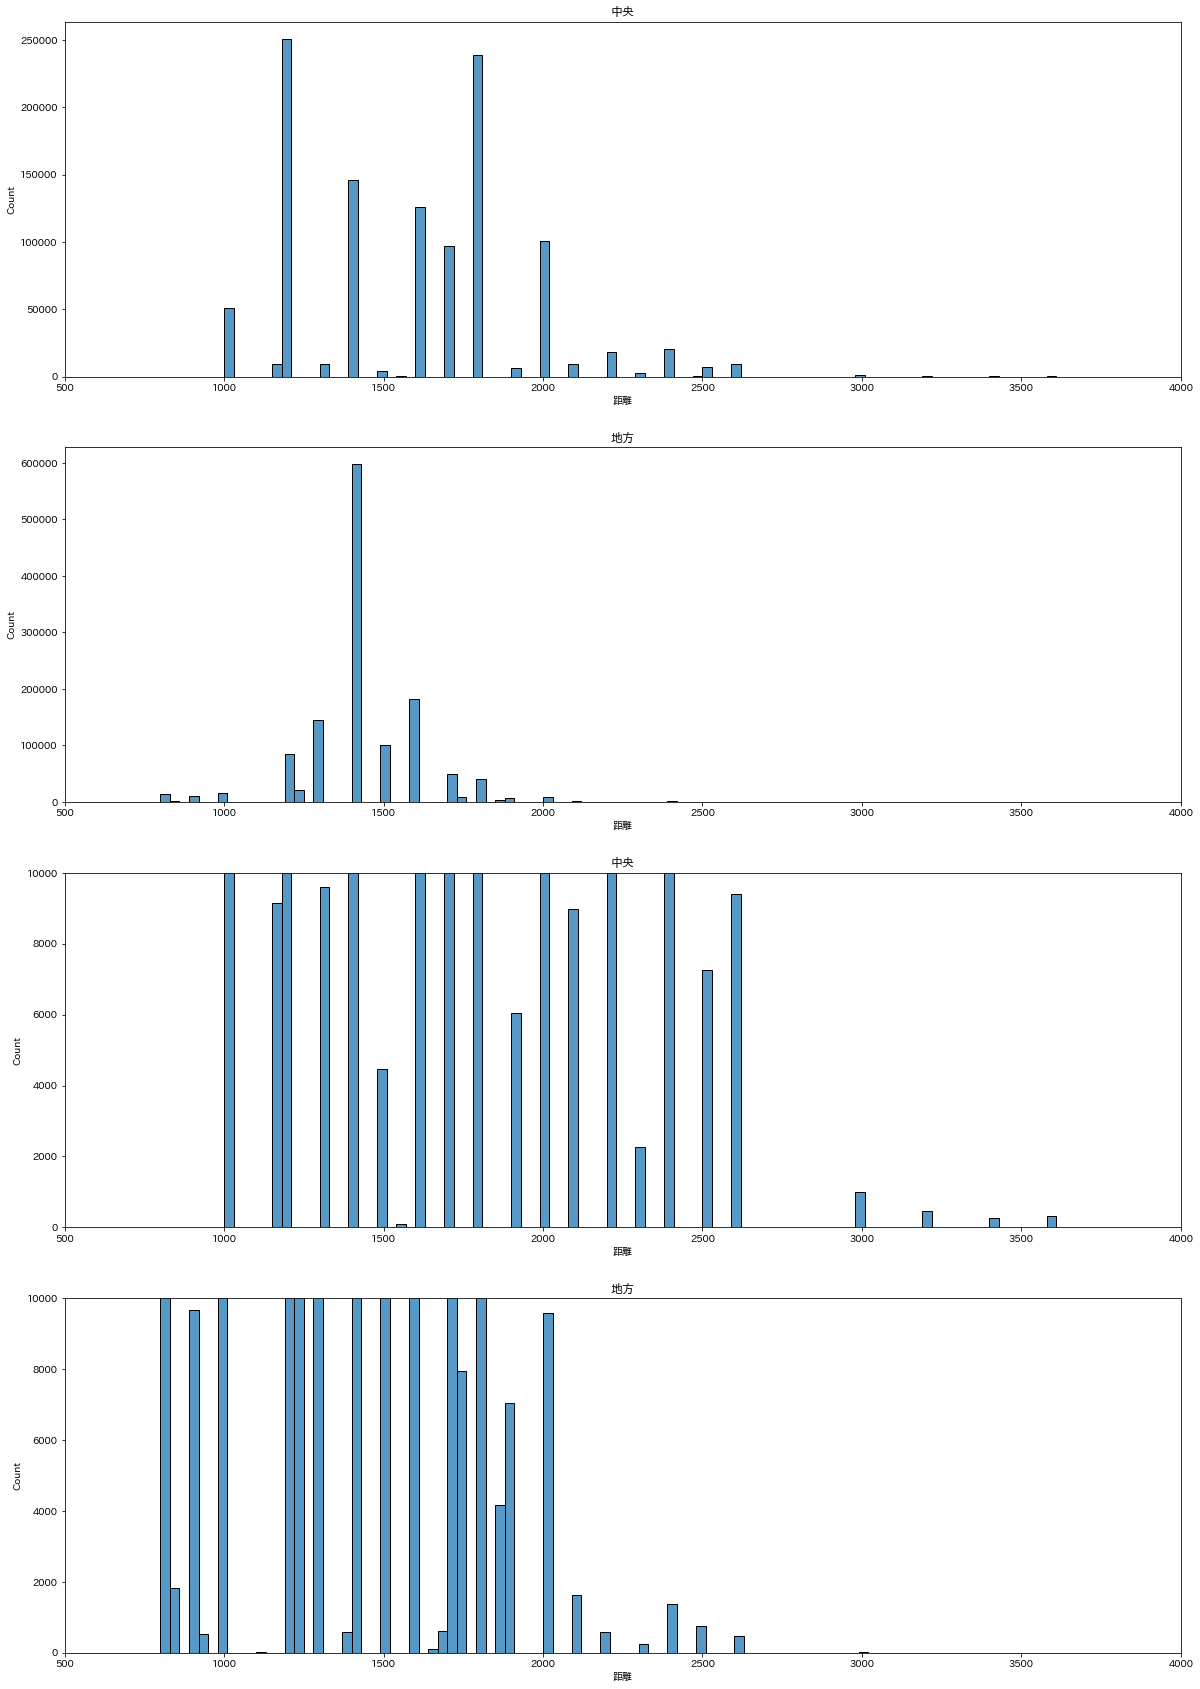

In [715]:
df_urban['距離'] = df_urban['距離'].str.strip('芝')
df_urban['距離'] = df_urban['距離'].str.strip('ダ')

df_rural['距離'] = df_rural['距離'].str.strip('芝')
df_rural['距離'] = df_rural['距離'].str.strip('ダ')

fig, ax = plt.subplots(4, 1, figsize=(20, 30))
sns.histplot(df_urban['距離'].astype(int).sort_values(), binwidth=30, ax=ax[0])
sns.histplot(df_rural['距離'].astype(int).sort_values(), binwidth=30, ax=ax[1])
sns.histplot(df_urban['距離'].astype(int).sort_values(), binwidth=30, ax=ax[2])
sns.histplot(df_rural['距離'].astype(int).sort_values(), binwidth=30, ax=ax[3])
ax[0].set(title='中央', xlim=(500, 4000))
ax[1].set(title='地方', xlim=(500, 4000))
ax[2].set(title='中央', xlim=(500, 4000), ylim=(0, 10000))
ax[3].set(title='地方', xlim=(500, 4000), ylim=(0, 10000))

print(df_urban.shape)
print(df_rural.shape)
print(df.shape)

## 芝/ダートのレース名の確認

In [716]:
for i in df_urban[df_urban['芝/ダート']=='芝']['レース名'].unique():
    if 'G1' in i:
        print(i)

皐月賞(G1)
阪神ジュベナイルF(G1)
朝日フューチュリティ(G1)
秋華賞(G1)
NHKマイルC(G1)
菊花賞(G1)
東京優駿(G1)
ホープフルS(G1)
宝塚記念(G1)
安田記念(G1)
天皇賞(春)(G1)
有馬記念(G1)
ジャパンC(G1)
天皇賞(秋)(G1)
大阪杯(G1)
エリザベス女王杯(G1)
優駿牝馬(G1)
桜花賞(G1)
スプリンターズS(G1)
高松宮記念(G1)
ヴィクトリアマイル(G1)
マイルチャンピオンS(G1)
朝日杯FS(G1)
朝日杯3歳S(G1)
阪神3歳牝馬S(G1)
高松宮杯(G1)


In [717]:
for i in df_urban[df_urban['芝/ダート']=='ダート']['レース名'].unique():
    if 'G1' in i:
        print(i)

フェブラリーS(G1)
チャンピオンズC(G1)
JBCクラシック(G1)
JBCスプリント(G1)
JBCレディスクラシ(G1)
ジャパンカップダート(G1)
マイルCS南部杯(G1)


- 中央のG1は圧倒的に芝が多い

### 3000m以上のレースってなんじゃ？

In [718]:
df_urban['レース名'][df_urban['距離'].astype(int) >=3000].unique()

array(['ステイヤーズS(G2)', 'ダイヤモンドS(G3)', '阪神大賞典(G2)', '菊花賞(G1)', '万葉S(OP)',
       '天皇賞(春)(G1)', '松籟S(3勝クラス)', '古都S(3勝クラス)', 'ドンカスターS(OP)',
       'ドンカスターS(1600万下)', '嵐山S(OP)', 'ステイヤーズS(G3)'], dtype=object)

In [719]:
df.isnull().sum()

horse_id         0
日付               0
開催               0
天気              11
R                0
レース名             0
頭数               0
枠番               0
馬番               0
オッズ         179304
人気               9
着順               0
騎手               0
斤量               0
距離               0
馬場              11
タイム              0
着差              11
馬体重              0
勝ち馬(2着馬)         5
レース場             0
中央/地方            0
芝/ダート            0
dtype: int64

## まずはTarget作成

### 着順はレースあたりの頭数で重み付け

In [720]:
df['着順'] = df['着順'].str.strip('(降)')
df['着順'] = df['着順'].str.strip('(再')
df['着順'] = df['着順'].astype(float).astype(int)
print(df['着順'].unique())

[ 3  1  2  5  4  7  8  6 10 11  9 14 12 13 15 16 17 18]


In [721]:
df_urban['着順'] = df_urban['着順'].str.strip('(降)')
df_urban['着順'] = df_urban['着順'].str.strip('(再')
df_urban['着順'] = df_urban['着順'].astype(float).astype(int)
print(df_urban['着順'].unique())

df_rural['着順'] = df_rural['着順'].str.strip('(降)')
df_rural['着順'] = df_rural['着順'].str.strip('(再')
df_rural['着順'] = df_rural['着順'].astype(float).astype(int)
print(df_rural['着順'].unique())

[ 3  1  2  5  4  7  8  6 10 11  9 14 12 13 15 16 17 18]
[ 3  2  5  1  9  8  4 10  6  7 13 14 11 12 16 15]


In [722]:
df['頭数'] = df['頭数'].astype(int)
print(df['頭数'].unique())

[10 14  8 16 12  9 15  5 13 11 17  7  6 18  4  3]


In [723]:
df_urban['頭数'] = df_urban['頭数'].astype(int)
print(df_urban['頭数'].unique())

df_rural['頭数'] = df_rural['頭数'].astype(int)
print(df_rural['頭数'].unique())

[10 14  8 16 12  9 15  5 13 11 17  7  6 18  4]
[ 9  7 12 10 11 13  6 14  8  5 16  4 15  3]


In [724]:
df['着順/頭数'] = df['着順'] / df['頭数']
df.head()

,horse_id,日付,開催,天気,R,レース名,頭数,枠番,馬番,オッズ,...,距離,馬場,タイム,着差,馬体重,勝ち馬(2着馬),レース場,中央/地方,芝/ダート,着順/頭数
0,2020105571,2022/09/24,4中山6,曇,9.0,カンナS(OP),10,3.0,3.0,12.9,...,芝1200,重,1:09.7,0.3,466(+2),ウメムスビ,中山,中央,芝,0.300000
1,2020105571,2022/09/03,2札幌7,晴,1.0,2歳未勝利,14,7.0,12.0,1.9,...,芝1200,良,1:10.7,-0.5,464(-2),(コパカバーナビーチ),札幌,中央,芝,0.071429
2,2020105571,2022/08/27,2札幌5,曇,2.0,2歳未勝利,8,4.0,4.0,2.2,...,芝1200,良,1:10.5,0.1,466(+2),バロットボックス,札幌,中央,芝,0.250000
3,2020105571,2022/08/06,1札幌5,晴,5.0,2歳新馬,8,3.0,3.0,21.9,...,芝1200,良,1:10.9,0.8,464(0),メイクアスナッチ,札幌,中央,芝,0.625000
4,2020101863,2022/09/25,4中山7,晴,2.0,2歳未勝利,16,8.0,15.0,6.6,...,芝1200,稍,1:10.0,0.6,420(-2),クリノゴッホ,中山,中央,芝,0.312500


In [725]:
df_urban['着順/頭数'] = df_urban['着順'] / df_urban['頭数']
df_rural['着順/頭数'] = df_rural['着順'] / df_rural['頭数']
print(df_urban.head())
print(df_rural.head())

     horse_id          日付    開催 天気    R      レース名  頭数   枠番    馬番   オッズ  ...  \
0  2020105571  2022/09/24  4中山6  曇  9.0  カンナS(OP)  10  3.0   3.0  12.9  ...   
1  2020105571  2022/09/03  2札幌7  晴  1.0     2歳未勝利  14  7.0  12.0   1.9  ...   
2  2020105571  2022/08/27  2札幌5  曇  2.0     2歳未勝利   8  4.0   4.0   2.2  ...   
3  2020105571  2022/08/06  1札幌5  晴  5.0      2歳新馬   8  3.0   3.0  21.9  ...   
4  2020101863  2022/09/25  4中山7  晴  2.0     2歳未勝利  16  8.0  15.0   6.6  ...   

     距離  馬場     タイム   着差      馬体重     勝ち馬(2着馬) レース場  中央/地方 芝/ダート     着順/頭数  
0  1200   重  1:09.7  0.3  466(+2)        ウメムスビ   中山     中央     芝  0.300000  
1  1200   良  1:10.7 -0.5  464(-2)  (コパカバーナビーチ)   札幌     中央     芝  0.071429  
2  1200   良  1:10.5  0.1  466(+2)     バロットボックス   札幌     中央     芝  0.250000  
3  1200   良  1:10.9  0.8   464(0)     メイクアスナッチ   札幌     中央     芝  0.625000  
4  1200   稍  1:10.0  0.6  420(-2)       クリノゴッホ   中山     中央     芝  0.312500  

[5 rows x 24 columns]
       horse_id          日付   開催 天気     

### 頭数>=6 のレースに絞る

In [726]:
print('中央データ数: ', df_urban.shape)
print('地方データ数: ', df_rural.shape)

中央データ数:  (1108855, 24)
地方データ数:  (1296387, 24)


In [727]:
df_urban = df_urban[df_urban['頭数'].astype(int) >= 6]
print(df_urban['頭数'].unique())
print('中央データ数: ', df_urban.shape)

df_rural = df_rural[df_rural['頭数'].astype(int) >= 6]
print(df_rural['頭数'].unique())
print('地方データ数: ', df_rural.shape)

[10 14  8 16 12  9 15 13 11 17  7  6 18]
中央データ数:  (1108540, 24)
[ 9  7 12 10 11 13  6 14  8 16 15]
地方データ数:  (1292899, 24)


## targetを作成する

In [728]:
a.head()

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago
0,1988105984,0.0,0.600000,0.333333,0.066667,0.538462
1,1991103531,0.0,0.461538,0.666667,0.375000,NaN
2,1991190011,0.0,NaN,NaN,NaN,NaN
3,1992100038,0.0,0.555556,0.636364,0.375000,0.333333
4,1992101546,0.0,0.285714,0.250000,0.250000,0.750000


In [729]:
df.reset_index(inplace=True)

count = 0
count_per_hid = []
for ids, hid in enumerate(df['horse_id']):
    if ids == 0 or df['horse_id'][ids] != df['horse_id'][ids-1]:
        count = 0
    else:
        count += 1
    count_per_hid += [count]
df['count_per_hid'] = count_per_hid

pdf = df.pivot_table(values=['着順/頭数'], index=['horse_id'], columns=['count_per_hid'], aggfunc='max')
pdf = pdf.iloc[:,:6]
pdf.head()
pdf.reset_index(inplace=True)
pdf.columns = ['horse_id', 'target', '1g_ago', '2g_ago', '3g_ago', '4g_ago', '5g_ago']
pdf['target'] = pdf['target'].where(pdf['target'] <= 0.17, 0)
pdf['target'] = pdf['target'].where(pdf['target'] == 0, 1)

In [730]:
df_urban.reset_index(inplace=True)

count = 0
count_per_hid = []
for ids, hid in enumerate(df_urban['horse_id']):
    if ids == 0 or df_urban['horse_id'][ids] != df_urban['horse_id'][ids-1]:
        count = 0
    else:
        count += 1
    count_per_hid += [count]
df_urban['count_per_hid'] = count_per_hid

pivot_df_urban = df_urban.pivot_table(values=['着順/頭数'], index=['horse_id'], columns=['count_per_hid'], aggfunc='max')
pivot_df_urban = pivot_df_urban.iloc[:,:6]
pivot_df_urban.head()
pivot_df_urban.reset_index(inplace=True)
pivot_df_urban.columns = ['horse_id', 'target', '1g_ago', '2g_ago', '3g_ago', '4g_ago', '5g_ago']
pivot_df_urban['target'] = pivot_df_urban['target'].where(pivot_df_urban['target'] <= 0.17, 0)
pivot_df_urban['target'] = pivot_df_urban['target'].where(pivot_df_urban['target'] == 0, 1)

In [731]:
df_rural.reset_index(inplace=True)

count = 0
count_per_hid = []
for ids, hid in enumerate(df_rural['horse_id']):
    if ids == 0 or df_rural['horse_id'][ids] != df_rural['horse_id'][ids-1]:
        count = 0
    else:
        count += 1
    count_per_hid += [count]
df_rural['count_per_hid'] = count_per_hid

pivot_df_rural = df_rural.pivot_table(values=['着順/頭数'], index=['horse_id'], columns=['count_per_hid'], aggfunc='max')
pivot_df_rural = pivot_df_rural.iloc[:,:6]
pivot_df_rural.head()
pivot_df_rural.reset_index(inplace=True)
pivot_df_rural.columns = ['horse_id', 'target', '1g_ago', '2g_ago', '3g_ago', '4g_ago', '5g_ago']
pivot_df_rural['target'] = pivot_df_rural['target'].where(pivot_df_rural['target'] <= 0.17, 0)
pivot_df_rural['target'] = pivot_df_rural['target'].where(pivot_df_rural['target'] == 0, 1)

In [732]:
print('中央馬データ数: ', pivot_df_urban.shape)
print('地方データ数: ', pivot_df_rural.shape)
pivot_df_urban.merge(pivot_df_rural, how='outer', on='horse_id')

中央馬データ数:  (106766, 7)
地方データ数:  (59258, 7)


,horse_id,target_x,1g_ago_x,2g_ago_x,3g_ago_x,4g_ago_x,5g_ago_x,target_y,1g_ago_y,2g_ago_y,3g_ago_y,4g_ago_y,5g_ago_y
0,1988105984,0.0,0.333333,0.538462,0.083333,0.071429,0.363636,0.0,0.066667,0.812500,0.083333,1.000000,1.000000
1,1991103531,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.666667,0.375000,NaN,NaN,NaN
2,1991190011,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992100038,0.0,0.555556,0.636364,0.375000,0.333333,0.833333,NaN,NaN,NaN,NaN,NaN,NaN
4,1992101546,0.0,0.928571,0.769231,0.941176,0.600000,0.750000,0.0,0.285714,0.250000,0.250000,0.750000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106838,2018104081,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.000000,0.777778,1.000000,0.666667,NaN
106839,2018106008,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.888889,0.900000,NaN,NaN,NaN
106840,2019102154,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.714286,0.700000,0.100000,0.454545,0.200000
106841,2019103368,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.909091,NaN,NaN,NaN,NaN


## 5試合以上の成績がない馬は除外

In [733]:
print(pivot_df_urban.isnull().sum())
print(pivot_df_rural.isnull().sum())

horse_id        0
target          0
1g_ago       7231
2g_ago      17011
3g_ago      27490
4g_ago      36932
5g_ago      45286
dtype: int64
horse_id        0
target          0
1g_ago       5970
2g_ago       9570
3g_ago      12370
4g_ago      14854
5g_ago      17194
dtype: int64


In [734]:
print(pivot_df_urban.shape)
pivot_df_urban = pivot_df_urban[pivot_df_urban['5g_ago'].notnull()]
print(pivot_df_urban.shape)

print(pivot_df_rural.shape)
pivot_df_rural = pivot_df_rural[pivot_df_rural['5g_ago'].notnull()]
print(pivot_df_rural.shape)

(106766, 7)
(61480, 7)
(59258, 7)
(42064, 7)


In [735]:
print(pivot_df_urban.isnull().sum())
print(pivot_df_rural.isnull().sum())

horse_id    0
target      0
1g_ago      0
2g_ago      0
3g_ago      0
4g_ago      0
5g_ago      0
dtype: int64
horse_id    0
target      0
1g_ago      0
2g_ago      0
3g_ago      0
4g_ago      0
5g_ago      0
dtype: int64


### 中央/地方の重複する馬のデータ数を確認する

In [736]:
print('重複馬データ数: ', pivot_df_urban.merge(pivot_df_rural, how='inner', on='horse_id').shape[0])

重複馬データ数:  23179


## 直近レースの着率の分布を確認する

<AxesSubplot:xlabel='5g_ago', ylabel='Count'>

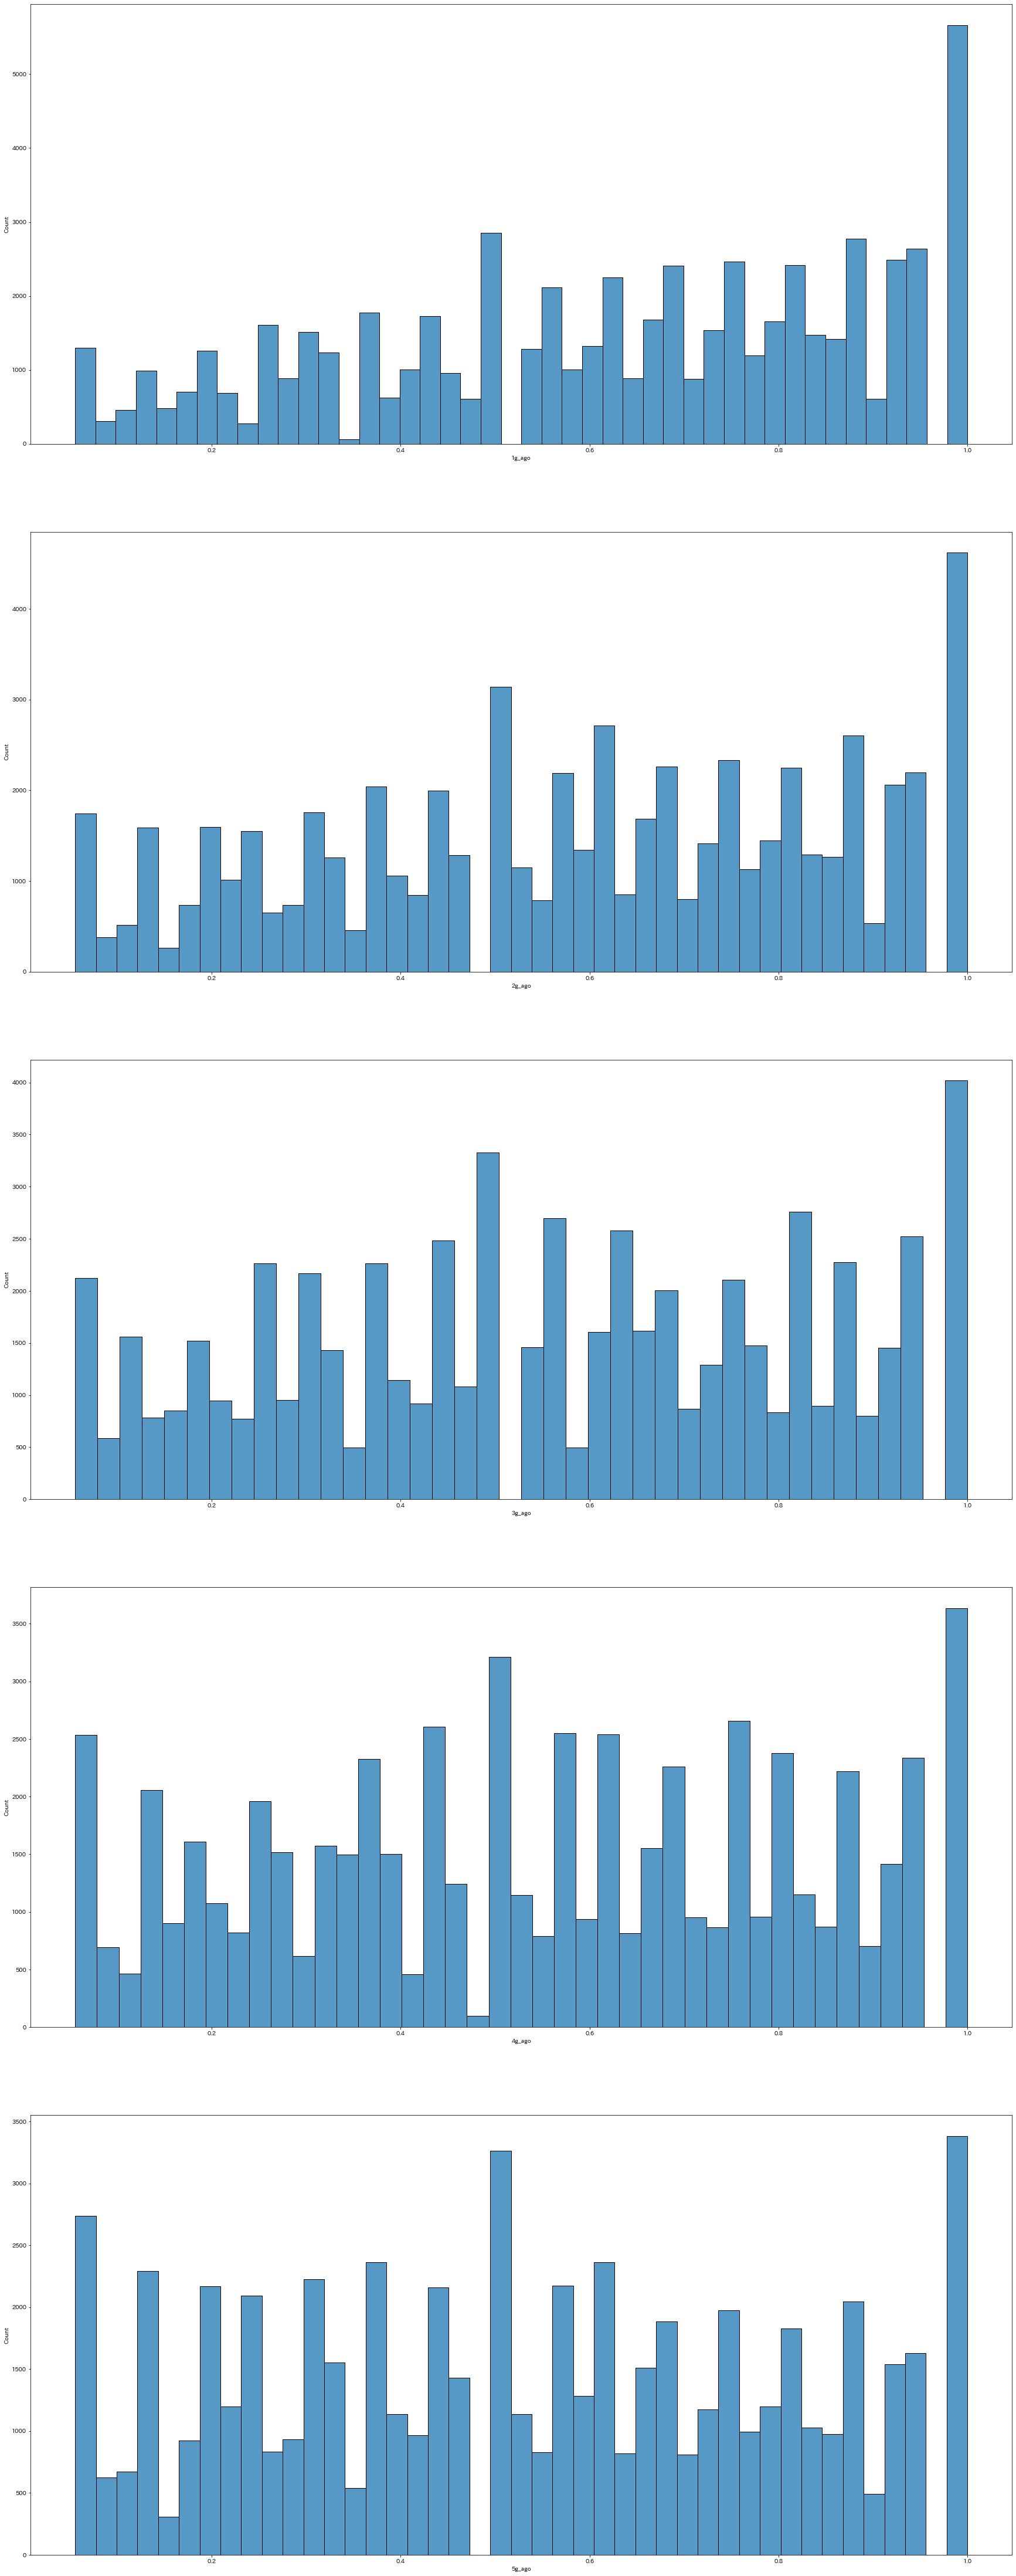

In [737]:
fig, ax = plt.subplots(5, 1, figsize=(30,80))
sns.histplot(pivot_df_urban['1g_ago'], ax=ax[0])
sns.histplot(pivot_df_urban['2g_ago'], ax=ax[1])
sns.histplot(pivot_df_urban['3g_ago'], ax=ax[2])
sns.histplot(pivot_df_urban['4g_ago'], ax=ax[3])
sns.histplot(pivot_df_urban['5g_ago'], ax=ax[4])

## 馬ごとの芝/ダートでの平均着順(頭数で重み付け済み)を算出する

### nullに関しては平均値で補完する。

In [738]:
df.groupby('horse_id').head()

,index,horse_id,日付,開催,天気,R,レース名,頭数,枠番,馬番,...,馬場,タイム,着差,馬体重,勝ち馬(2着馬),レース場,中央/地方,芝/ダート,着順/頭数,count_per_hid
0,0,2020105571,2022/09/24,4中山6,曇,9.0,カンナS(OP),10,3.0,3.0,...,重,1:09.7,0.3,466(+2),ウメムスビ,中山,中央,芝,0.300000,0
1,1,2020105571,2022/09/03,2札幌7,晴,1.0,2歳未勝利,14,7.0,12.0,...,良,1:10.7,-0.5,464(-2),(コパカバーナビーチ),札幌,中央,芝,0.071429,1
2,2,2020105571,2022/08/27,2札幌5,曇,2.0,2歳未勝利,8,4.0,4.0,...,良,1:10.5,0.1,466(+2),バロットボックス,札幌,中央,芝,0.250000,2
3,3,2020105571,2022/08/06,1札幌5,晴,5.0,2歳新馬,8,3.0,3.0,...,良,1:10.9,0.8,464(0),メイクアスナッチ,札幌,中央,芝,0.625000,3
4,4,2020101863,2022/09/25,4中山7,晴,2.0,2歳未勝利,16,8.0,15.0,...,稍,1:10.0,0.6,420(-2),クリノゴッホ,中山,中央,芝,0.312500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405220,2570718,1994100530,2000/06/25,3阪神4,雨,11.0,宝塚記念(G1),11,5.0,5.0,...,良,2:15.6,1.8,510(-12),テイエムオペラオー,阪神,中央,芝,0.727273,0
2405221,2570719,1994100530,2000/05/27,2中京3,雨,11.0,金鯱賞(G2),11,7.0,9.0,...,稍,2:00.5,2.0,522(+18),メイショウドトウ,中京,中央,芝,0.909091,1
2405222,2570720,1994100530,1999/08/22,1札幌6,曇,11.0,札幌記念(G2),10,1.0,1.0,...,良,2:01.4,1.3,504(-2),セイウンスカイ,札幌,中央,芝,0.700000,2
2405223,2570721,1994100530,1999/07/11,3阪神8,晴,11.0,宝塚記念(G1),12,6.0,7.0,...,良,2:14.0,1.9,506(-6),グラスワンダー,阪神,中央,芝,0.416667,3


#### 中央/地方 両方

In [739]:
temp_df = df[df['芝/ダート']=='芝']
df_rank_glass = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())
temp_df = df[df['芝/ダート']=='ダート']
df_rank_dirt = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())

df_rank_all = pd.DataFrame(df.groupby('horse_id')['着順/頭数'].mean())

df_rank = df_rank_glass.merge(df_rank_dirt, how='outer', on='horse_id')
df_rank = df_rank.merge(df_rank_all, how='outer', on='horse_id')
df_rank.columns = ['rank_glass', 'rank_dirt', 'rank']
df_rank.reset_index(inplace=True)

#temp_df[temp_df['芝/ダート']=='芝']

In [740]:
df_rank.head()
df_rank.isnull().sum()

horse_id          0
rank_glass    21141
rank_dirt     11251
rank              0
dtype: int64

#### 中央

In [741]:
temp_df = df_urban[df_urban['芝/ダート']=='芝']
df_rank_glass = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())
temp_df = df_urban[df_urban['芝/ダート']=='ダート']
df_rank_dirt = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())

df_rank_all = pd.DataFrame(df_urban.groupby('horse_id')['着順/頭数'].mean())

df_rank_urban = df_rank_glass.merge(df_rank_dirt, how='outer', on='horse_id')
df_rank_urban = df_rank_urban.merge(df_rank_all, how='outer', on='horse_id')
df_rank_urban.columns = ['rank_glass', 'rank_dirt', 'rank']
df_rank_urban.reset_index(inplace=True)
#temp_df[temp_df['芝/ダート']=='芝']

In [742]:
df_rank_urban.isnull().sum()

horse_id          0
rank_glass    21372
rank_dirt     18320
rank              0
dtype: int64

- 芝/ダート合計の勝率はレース数で重み付けした方が良いかも

In [743]:
df_rank_urban.head()

,horse_id,rank_glass,rank_dirt,rank
0,1991103531,0.777778,NaN,0.777778
1,1991190011,0.562500,NaN,0.562500
2,1992100038,0.485277,0.480977,0.484891
3,1992101546,0.405078,0.398181,0.403326
4,1992102844,0.421091,0.928571,0.435187


In [744]:
df_rank_urban.shape

(106766, 4)

In [745]:
df_rank_urban.isnull().sum()

horse_id          0
rank_glass    21372
rank_dirt     18320
rank              0
dtype: int64

In [746]:
df_rank_urban.mean()

horse_id      2.008319e+09
rank_glass    6.465105e-01
rank_dirt     6.409385e-01
rank          6.139202e-01
dtype: float64

In [747]:
#df_rank_urban = df_rank_urban.fillna(df_rank_urban.mean())

In [748]:
df_rank_urban.isnull().sum()

horse_id          0
rank_glass    21372
rank_dirt     18320
rank              0
dtype: int64

#### 地方

In [749]:
temp_df = df_rural[df_rural['芝/ダート']=='芝']
df_rank_glass = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())
temp_df = df_rural[df_rural['芝/ダート']=='ダート']
df_rank_dirt = pd.DataFrame(temp_df.groupby('horse_id')['着順/頭数'].mean())

df_rank_all = pd.DataFrame(df_rural.groupby('horse_id')['着順/頭数'].mean())

df_rank_rural = df_rank_glass.merge(df_rank_dirt, how='outer', on='horse_id')
df_rank_rural = df_rank_rural.merge(df_rank_all, how='outer', on='horse_id')
df_rank_rural.columns = ['rank_glass', 'rank_dirt', 'rank']
df_rank_rural.reset_index(inplace=True)

In [750]:
df_rank_rural.head()

,horse_id,rank_glass,rank_dirt,rank
0,1993109205,0.400000,0.265129,0.284396
1,1993110046,0.166667,0.353698,0.347248
2,1994100345,0.422222,0.693293,0.659410
3,1994101209,0.416667,0.434065,0.433485
4,1994102433,0.624621,0.487307,0.509277


In [751]:
print(df_rank_rural.shape)
print(df_rank_rural.isnull().sum())

(59258, 4)
horse_id          0
rank_glass    55870
rank_dirt       204
rank              0
dtype: int64


In [752]:
print(df_rank_rural.mean())
#df_rank_rural = df_rank_rural.fillna(df_rank_rural.mean())
print(df_rank_rural.isnull().sum())

horse_id      2.008597e+09
rank_glass    5.683171e-01
rank_dirt     5.182552e-01
rank          5.173866e-01
dtype: float64
horse_id          0
rank_glass    55870
rank_dirt       204
rank              0
dtype: int64


In [753]:
print(df_rank_glass.shape)
print(df_rank_dirt.shape)

(3388, 1)
(59054, 1)


In [754]:
print(df_rank_urban.isnull().sum())
print(df_rank_urban.shape)
print(df_rank_rural.isnull().sum())
print(df_rank_rural.shape)

horse_id          0
rank_glass    21372
rank_dirt     18320
rank              0
dtype: int64
(106766, 4)
horse_id          0
rank_glass    55870
rank_dirt       204
rank              0
dtype: int64
(59258, 4)


## 平均着順とtargetの相関を確認する

In [755]:
print(pdf.shape)
print(df_rank.shape)
pivot_df = pdf.merge(df_rank, how='inner', on='horse_id')
print(pivot_df.shape)
pivot_df.head()

(106845, 7)
(106845, 4)
(106845, 10)


,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
0,1988105984,0.0,0.600000,0.333333,0.066667,0.538462,0.083333,NaN,0.403643,0.403643
1,1991103531,0.0,0.461538,0.666667,0.375000,NaN,NaN,0.777778,0.501068,0.570246
2,1991190011,0.0,NaN,NaN,NaN,NaN,NaN,0.562500,NaN,0.562500
3,1992100038,0.0,0.555556,0.636364,0.375000,0.333333,0.833333,0.485277,0.480977,0.484891
4,1992101546,0.0,0.285714,0.250000,0.250000,0.750000,0.333333,0.405078,0.458542,0.424120


In [756]:
print(pivot_df_urban.shape)
print(df_rank_urban.shape)
pivot_df_urban = pivot_df_urban.merge(df_rank, how='inner', on='horse_id')
print(pivot_df_urban.shape)
pivot_df_urban.head()

(61480, 7)
(106766, 4)
(61480, 10)


,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
0,1988105984,0.0,0.333333,0.538462,0.083333,0.071429,0.363636,NaN,0.403643,0.403643
1,1992100038,0.0,0.555556,0.636364,0.375000,0.333333,0.833333,0.485277,0.480977,0.484891
2,1992101546,0.0,0.928571,0.769231,0.941176,0.600000,0.750000,0.405078,0.458542,0.424120
3,1992102844,0.0,0.666667,0.588235,0.266667,0.625000,0.416667,0.421091,0.928571,0.435187
4,1992104930,0.0,0.750000,0.636364,1.000000,0.900000,1.000000,0.802564,0.504846,0.524476


In [757]:
print(pivot_df_rural.shape)
print(df_rank_rural.shape)

(42064, 7)
(59258, 4)


In [758]:
print(pivot_df_rural.shape)
print(df_rank_rural.shape)
pivot_df_rural = pivot_df_rural.merge(df_rank, how='inner', on='horse_id')
print(pivot_df_rural.shape)

(42064, 7)
(59258, 4)
(42064, 10)


In [759]:
pivot_df_rural.head()

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
0,1988105984,0.0,0.066667,0.812500,0.083333,1.000000,1.000000,NaN,0.403643,0.403643
1,1992101546,0.0,0.285714,0.250000,0.250000,0.750000,0.333333,0.405078,0.458542,0.424120
2,1992104930,0.0,0.833333,0.900000,0.900000,0.800000,0.333333,0.802564,0.504846,0.524476
3,1993100815,0.0,0.555556,0.083333,0.307692,0.571429,0.357143,0.955556,0.318073,0.361538
4,1993101459,0.0,0.500000,0.812500,0.363636,0.571429,0.733333,0.672542,0.433191,0.493922


In [760]:
corr = pivot_df.corr()
corr

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
horse_id,1.000000,0.084232,-0.095938,-0.080638,-0.062858,-0.056951,-0.045241,-0.000446,-0.046908,-0.052310
target,0.084232,1.000000,-0.232464,-0.176685,-0.138974,-0.116651,-0.095152,-0.138845,-0.238892,-0.267636
1g_ago,-0.095938,-0.232464,1.000000,0.416444,0.320184,0.255095,0.212825,0.247213,0.449558,0.506559
2g_ago,-0.080638,-0.176685,0.416444,1.000000,0.385718,0.303891,0.242502,0.228118,0.437769,0.502931
3g_ago,-0.062858,-0.138974,0.320184,0.385718,1.000000,0.375556,0.290186,0.209137,0.414134,0.489441
4g_ago,-0.056951,-0.116651,0.255095,0.303891,0.375556,1.000000,0.357946,0.193609,0.394452,0.479530
5g_ago,-0.045241,-0.095152,0.212825,0.242502,0.290186,0.357946,1.000000,0.187535,0.373135,0.464688
rank_glass,-0.000446,-0.138845,0.247213,0.228118,0.209137,0.193609,0.187535,1.000000,0.144768,0.601348
rank_dirt,-0.046908,-0.238892,0.449558,0.437769,0.414134,0.394452,0.373135,0.144768,1.000000,0.849320
rank,-0.052310,-0.267636,0.506559,0.502931,0.489441,0.479530,0.464688,0.601348,0.849320,1.000000


<AxesSubplot:>

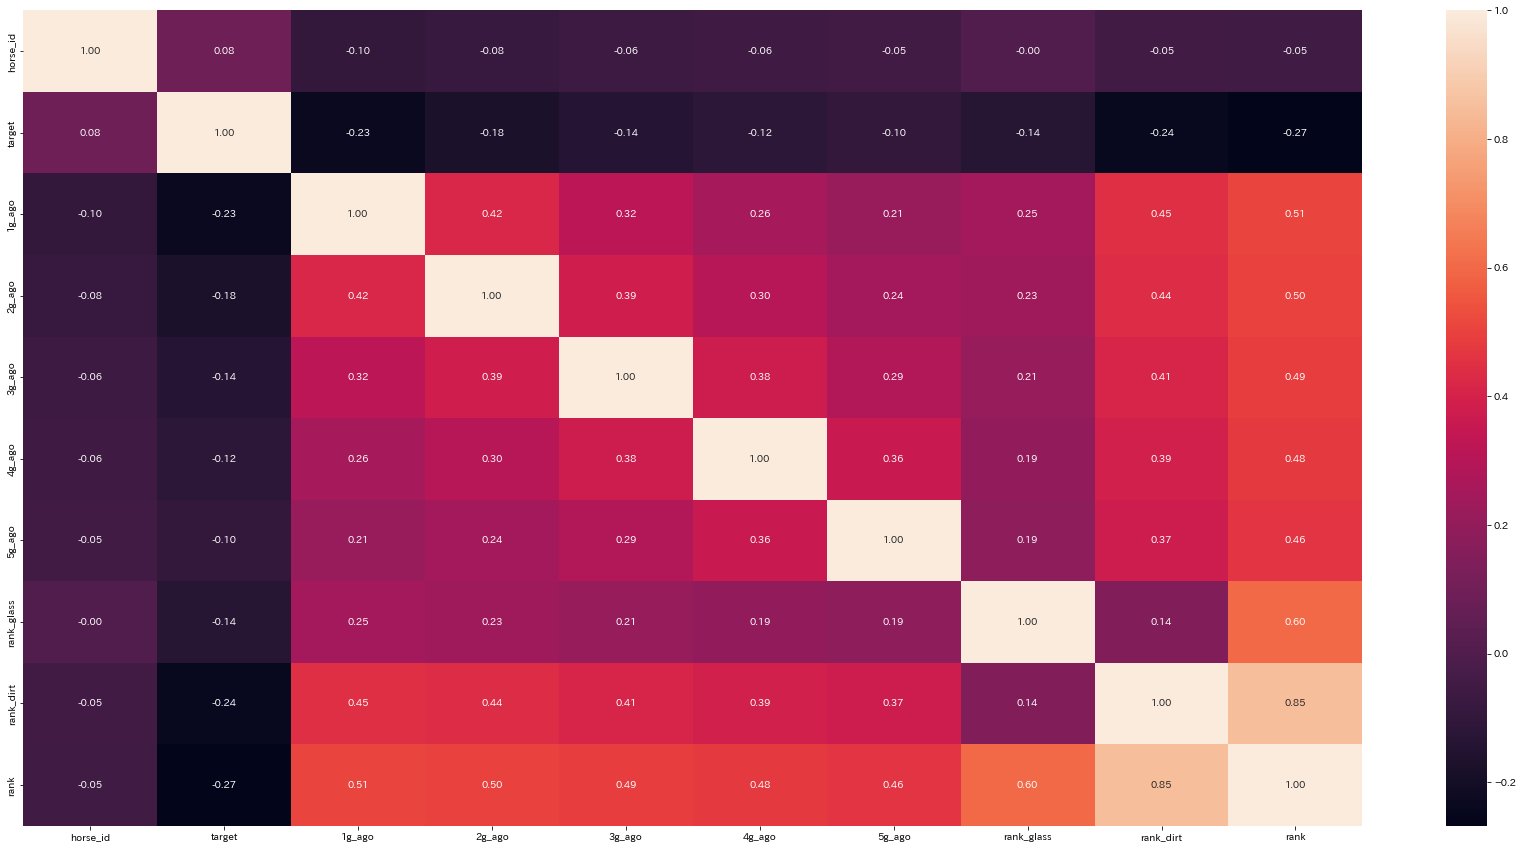

In [761]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, fmt='.2f')

In [762]:
corr_urban = pivot_df_urban.corr()
#plt.figure(figsize=(15, 8))
#sns.pairplot(df_temp[['target, ]])
#plt.show()
corr_urban

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
horse_id,1.000000,0.042829,-0.077255,-0.067884,-0.057893,-0.056466,-0.054179,-0.035151,-0.066010,-0.098544
target,0.042829,1.000000,-0.204750,-0.155018,-0.122502,-0.109294,-0.100101,-0.151207,-0.146229,-0.233094
1g_ago,-0.077255,-0.204750,1.000000,0.394672,0.289633,0.229730,0.179500,0.308142,0.253919,0.400770
2g_ago,-0.067884,-0.155018,0.394672,1.000000,0.343908,0.254639,0.199447,0.312063,0.253506,0.404862
3g_ago,-0.057893,-0.122502,0.289633,0.343908,1.000000,0.324422,0.232943,0.302027,0.250246,0.402296
4g_ago,-0.056466,-0.109294,0.229730,0.254639,0.324422,1.000000,0.316436,0.306083,0.244222,0.399673
5g_ago,-0.054179,-0.100101,0.179500,0.199447,0.232943,0.316436,1.000000,0.316195,0.221389,0.381541
rank_glass,-0.035151,-0.151207,0.308142,0.312063,0.302027,0.306083,0.316195,1.000000,0.022323,0.514896
rank_dirt,-0.066010,-0.146229,0.253919,0.253506,0.250246,0.244222,0.221389,0.022323,1.000000,0.729324
rank,-0.098544,-0.233094,0.400770,0.404862,0.402296,0.399673,0.381541,0.514896,0.729324,1.000000


<AxesSubplot:>

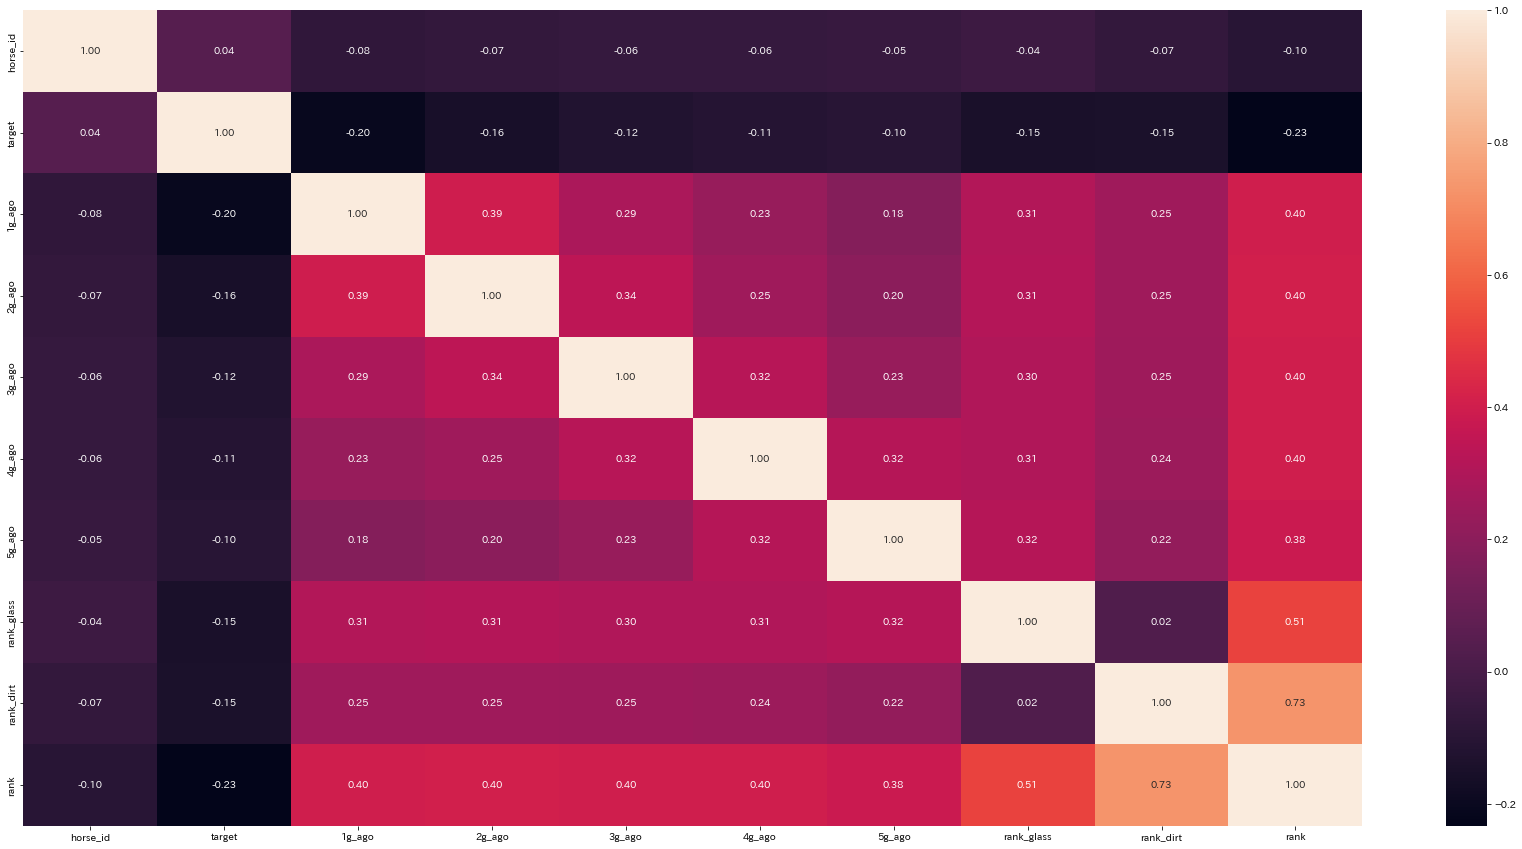

In [763]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr_urban, annot=True, fmt='.2f')

In [764]:
corr_rural = pivot_df_rural.corr()
corr_rural

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank
horse_id,1.000000,0.057581,-0.064278,-0.054470,-0.044842,-0.043180,-0.037411,0.044338,0.004152,0.018040
target,0.057581,1.000000,-0.262901,-0.226370,-0.197591,-0.177210,-0.157131,-0.027537,-0.260397,-0.238395
1g_ago,-0.064278,-0.262901,1.000000,0.453356,0.401389,0.342637,0.314834,0.022413,0.472733,0.444170
2g_ago,-0.054470,-0.226370,0.453356,1.000000,0.440467,0.390646,0.338793,0.020870,0.486958,0.455887
3g_ago,-0.044842,-0.197591,0.401389,0.440467,1.000000,0.430340,0.378738,0.014000,0.494729,0.460856
4g_ago,-0.043180,-0.177210,0.342637,0.390646,0.430340,1.000000,0.413405,0.013603,0.494326,0.461722
5g_ago,-0.037411,-0.157131,0.314834,0.338793,0.378738,0.413405,1.000000,0.011976,0.487914,0.456760
rank_glass,0.044338,-0.027537,0.022413,0.020870,0.014000,0.013603,0.011976,1.000000,0.043457,0.228089
rank_dirt,0.004152,-0.260397,0.472733,0.486958,0.494729,0.494326,0.487914,0.043457,1.000000,0.947290
rank,0.018040,-0.238395,0.444170,0.455887,0.460856,0.461722,0.456760,0.228089,0.947290,1.000000


<AxesSubplot:>

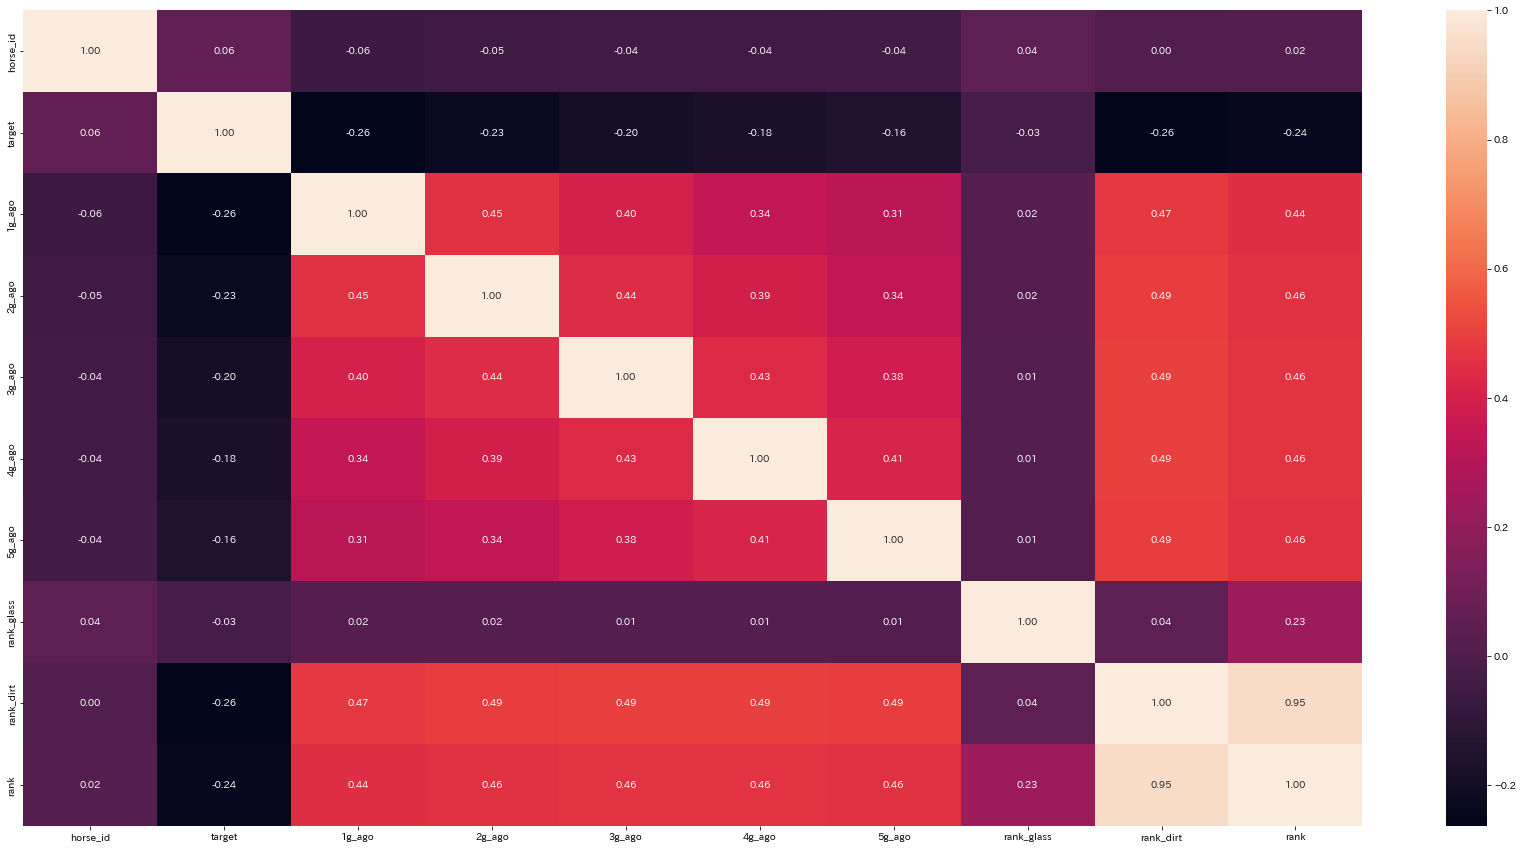

In [765]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr_rural, annot=True, fmt='.2f')

- targetとrankの相関係数は直近1,2試合の間程度の値となっている。
- 地方の芝レースにおける勝率は平均で欠損値保管すると相関がかなり下がるため、データとしては挿入しないほうがいいかも

In [766]:
print(pivot_df_urban.shape)
print(pivot_df_rural.shape)

(61480, 10)
(42064, 10)


## targetのレースが芝/ダートか追加する

df_temp = df.sort_values('horse_id').sort_values('日付')
df_temp = df_temp.groupby('horse_id').head(1)
df_temp['芝/ダート'].value_counts()

pivot_df = pivot_df.merge(df_temp[['horse_id', '芝/ダート']], how='inner', on='horse_id')

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
pivot_df['芝/ダート'] = lb.fit_transform(pivot_df['芝/ダート'])
pivot_df.head()

corr = pivot_df.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, fmt='.2f')

- 芝/ダートカテゴリ変数を追加する場合、target=1のデータに偏りがあると良くなさそう。偏りがあるか確認してみる。

plt.figure(figsize=(30,15))
sns.histplot(pivot_df[pivot_df['target']==1]['芝/ダート'])

- 極端に考える。target=1のデータ数が芝:1、ダート:1000を想定すると、モデルとしてはダートのほうがtarget=1と予測しやすくなってしまう気がする。これは後ほど試してみる。

## 親馬（パパ・ママ）のレース着順を入れてみる。

### まずは血統データをimportする

In [827]:
table_dir = '/Users/eee/python/jra_ml/data/table'
target_file = 'horse_pedigree.csv'
pedigree_path = os.path.join(table_dir, target_file)

usecols = ['horse_id', 'horse_name', 'f_1_1', 'm_1_1']
df_ped = pd.read_csv(pedigree_path, usecols=usecols)
df_ped

,horse_id,horse_name,f_1_1,m_1_1
0,2020105571,レイフォール,リオンディーズ(2013105915),バリアーモ(2012104909)
1,2020101863,コパカバーナビーチ,モーリス(2011100655),アンチャン(2013105370)
2,2020102360,クリノグローリー,ラブリーデイ(2010104298),モエレエターナル(2006103788)
3,2020103614,ラクサパーナ,ダイワメジャー(2001103114),ポロンナルワ(2008103176)
4,2020106585,ヴォンヌヴォー,ドレフォン(000a013b82),ヴェイルオブクララ(2011104478)
...,...,...,...,...
107083,1997103283,チトセリダー,ヒシアリダー(1990109099),ハヤノワイド(1992109414)
107084,1997104641,ラッキークィーン,アフリート(000a000013),スノーフレーク(1991108201)
107085,1997102790,ケイオーデビル,キンググローリアス(000a000d48),ブレハツトスキー(1987107037)
107086,1995108676,グラスワンダー,Silver Hawk(000a0019b4),Ameriflora(000a00a4b9)


In [828]:
df_ped['f_1_1'] = df_ped['f_1_1'].str.extract('(\d+)', expand=True)
df_ped['m_1_1'] = df_ped['m_1_1'].str.extract('(\d+)', expand=True)
df_ped.shape
#df_ped['f_2_1'] = df_ped['f_2_1'].str.extract('(\d+)', expand=True)
#df_ped['m_2_1'] = df_ped['m_2_1'].str.extract('(\d+)', expand=True)
#df_ped['f_2_2'] = df_ped['f_2_2'].str.extract('(\d+)', expand=True)
#df_ped['m_2_2'] = df_ped['m_2_2'].str.extract('(\d+)', expand=True)

(107088, 4)

In [829]:
df_ped.head()

,horse_id,horse_name,f_1_1,m_1_1
0,2020105571,レイフォール,2013105915,2012104909
1,2020101863,コパカバーナビーチ,2011100655,2013105370
2,2020102360,クリノグローリー,2010104298,2006103788
3,2020103614,ラクサパーナ,2001103114,2008103176
4,2020106585,ヴォンヌヴォー,000,2011104478


In [830]:
df_ped['temp'] = df_ped['f_1_1']=='000'
df_ped['国産/外国産'] = df_ped['temp'].where(df_ped['temp']==False, '外国産')
df_ped['国産/外国産'] = df_ped['国産/外国産'].where(df_ped['国産/外国産']=='外国産', '国産')
df_ped = df_ped.drop(columns='temp')
print('父親_国産/外国産:\n', df_ped['国産/外国産'].value_counts())

父親_国産/外国産:
 国産     70857
外国産    36231
Name: 国産/外国産, dtype: int64


In [831]:
df_ped['temp'] = df_ped['m_1_1']=='000'
df_ped['国産/外国産'] = df_ped['temp'].where(df_ped['temp']==False, '外国産')
df_ped['国産/外国産'] = df_ped['国産/外国産'].where(df_ped['国産/外国産']=='外国産', '国産')
df_ped = df_ped.drop(columns='temp')
print('父親_国産/外国産:\n', df_ped['国産/外国産'].value_counts())

父親_国産/外国産:
 国産     86738
外国産    20350
Name: 国産/外国産, dtype: int64


- かなりの数の馬が少なくとも両親のうちのどちらか一方が海外馬となっている。
- 海外馬のデータは欠損値が非常に多いため、使いづらいのかも...

### 海外馬が親の場合は除外

print(df_ped.shape)
df_ped = df_ped[df_ped['f_1_1']!='000']
print(df_ped.shape)
df_ped = df_ped[df_ped['m_1_1']!='000']
print(df_ped.shape)
df_ped.head()

- 両親ともに国産馬であるデータのみに絞ると、4万頭ほどのデータが除外された...

### ここから父馬/母馬それぞれのレース着順データを作成する

In [832]:
pivot_df_urban.isnull().sum()

horse_id         0
target           0
1g_ago           0
2g_ago           0
3g_ago           0
4g_ago           0
5g_ago           0
rank_glass    7124
rank_dirt     4990
rank             0
dtype: int64

In [833]:
pivot_df_urban.shape

(61480, 10)

In [834]:
pivot_df_rural.isnull().sum()

horse_id         0
target           0
1g_ago           0
2g_ago           0
3g_ago           0
4g_ago           0
5g_ago           0
rank_glass    8605
rank_dirt        0
rank             0
dtype: int64

In [835]:
pivot_df_rural.shape

(42064, 10)

In [866]:
print('中央データ数: ', pivot_df_urban.shape)
print('地方データ数: ', pivot_df_rural.shape)

#pivot_df = pd.concat([pivot_df_urban, pivot_df_rural], axis=0)
print(pivot_df.shape)
print(pivot_df.isnull().sum())

中央データ数:  (61480, 10)
地方データ数:  (42064, 10)
(106845, 10)
horse_id          0
target            0
1g_ago         4171
2g_ago         9214
3g_ago        14241
4g_ago        18837
5g_ago        23010
rank_glass    21141
rank_dirt     11251
rank              0
dtype: int64


- マージする際は一旦、onを訓練データ側に合わせるようにする。

In [867]:
right_pivot_df = pivot_df[['horse_id', 'rank_glass', 'rank_dirt', 'rank']]
right_pivot_df['horse_id'] = right_pivot_df['horse_id'].astype(str)
right_pivot_df.reset_index(inplace=True, drop=True)
print(right_pivot_df.dtypes)
print(right_pivot_df.shape)
print(right_pivot_df.isnull().sum())

horse_id       object
rank_glass    float64
rank_dirt     float64
rank          float64
dtype: object
(106845, 4)
horse_id          0
rank_glass    21141
rank_dirt     11251
rank              0
dtype: int64


/var/folders/8c/ctv36bkx7pv_b47nj404bc480000gn/T/ipykernel_14085/2915202553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_pivot_df['horse_id'] = right_pivot_df['horse_id'].astype(str)


#### 父親のrankから

In [868]:
left_df_ped = df_ped[['horse_id', 'f_1_1']].astype(str)
print(left_df_ped.dtypes)
print(left_df_ped.shape)

horse_id    object
f_1_1       object
dtype: object
(107088, 2)


In [869]:
left_df_ped[left_df_ped['f_1_1']=='000'].value_counts().sum()

36231

In [870]:
right_pivot_df[right_pivot_df['horse_id']=='2016101956']

,horse_id,rank_glass,rank_dirt,rank
87684,2016101956,0.469231,0.380044,0.42216


In [871]:
left_df_ped.columns = ['self_horse_id', 'horse_id']
df_f_rank = left_df_ped.merge(right_pivot_df, how='inner', on='horse_id')
df_f_rank = df_f_rank.drop('horse_id', axis=1)
df_f_rank.columns = ['father_horse_id', 'F_rank_glass', 'F_rank_dirt', 'F_rank']
print(df_f_rank)
print(df_f_rank.shape)
print(df_f_rank.isnull().sum())

      father_horse_id  F_rank_glass  F_rank_dirt    F_rank
0          2020105571      0.170278          NaN  0.170278
1          2019100451      0.170278          NaN  0.170278
2          2019103122      0.170278          NaN  0.170278
3          2020101337      0.170278          NaN  0.170278
4          2020106797      0.170278          NaN  0.170278
...               ...           ...          ...       ...
48801      2003107097      1.000000     0.234322  0.271672
48802      2003109409      0.413889     0.133333  0.373810
48803      2002109390      0.421091     0.928571  0.435187
48804      2002103567      0.415667     0.277976  0.395997
48805      2002102682      0.415667     0.277976  0.395997

[48806 rows x 4 columns]
(48806, 4)
father_horse_id        0
F_rank_glass         560
F_rank_dirt        30781
F_rank                 0
dtype: int64


#### 母親のrank

In [872]:
left_df_ped = df_ped[['horse_id', 'm_1_1']].astype(str)
left_df_ped.dtypes

horse_id    object
m_1_1       object
dtype: object

In [873]:
left_df_ped.columns = ['self_horse_id', 'horse_id']
df_m_rank = left_df_ped.merge(right_pivot_df, how='inner', on='horse_id')
df_m_rank = df_m_rank.drop('horse_id', axis=1)
df_m_rank.columns = ['horse_id', 'M_rank_glass', 'M_rank_dirt', 'M_rank']
print(df_m_rank.head())
print(df_m_rank.shape)
print(df_m_rank.isnull().sum())

     horse_id  M_rank_glass  M_rank_dirt    M_rank
0  2020105571      0.633307      0.65468  0.647246
1  2018101994      0.633307      0.65468  0.647246
2  2019100580      0.633307      0.65468  0.647246
3  2020101863      1.000000          NaN  1.000000
4  2019106855      1.000000          NaN  1.000000
(45467, 4)
horse_id           0
M_rank_glass    4558
M_rank_dirt     7130
M_rank             0
dtype: int64


In [874]:
print(pivot_df.shape)
print(df_f_rank.shape)
print(df_m_rank.shape)

(106845, 10)
(48806, 4)
(45467, 4)


In [875]:
df_m_rank.head()

,horse_id,M_rank_glass,M_rank_dirt,M_rank
0,2020105571,0.633307,0.65468,0.647246
1,2018101994,0.633307,0.65468,0.647246
2,2019100580,0.633307,0.65468,0.647246
3,2020101863,1.000000,NaN,1.000000
4,2019106855,1.000000,NaN,1.000000


#### 親のレース勝率をを追加する

In [876]:
print('# pivot_urban: ', pivot_df_urban.shape)
print('# ped: ', df_ped.shape)
print('# father_rank: ', df_f_rank.shape)
print('# mother_rank: ', df_m_rank.shape)

# pivot_urban:  (61480, 10)
# ped:  (107088, 5)
# father_rank:  (48806, 4)
# mother_rank:  (45467, 4)


In [891]:
temp = pivot_df_rural.merge(df_ped[['horse_id', 'f_1_1', 'm_1_1']], how='inner', on='horse_id')

In [892]:
print(temp.shape)
print(temp.isnull().sum())
print(temp.dtypes)

(42064, 12)
horse_id         0
target           0
1g_ago           0
2g_ago           0
3g_ago           0
4g_ago           0
5g_ago           0
rank_glass    8605
rank_dirt        0
rank             0
f_1_1            0
m_1_1            2
dtype: int64
horse_id        int64
target        float64
1g_ago        float64
2g_ago        float64
3g_ago        float64
4g_ago        float64
5g_ago        float64
rank_glass    float64
rank_dirt     float64
rank          float64
f_1_1          object
m_1_1          object
dtype: object


In [893]:
#temp['f_1_1'] = temp['f_1_1'].fillna('000').astype(int)
#temp['m_1_1'] = temp['m_1_1'].fillna('000').astype(int)

In [894]:
df_f_rank

,father_horse_id,F_rank_glass,F_rank_dirt,F_rank
0,2020105571,0.170278,NaN,0.170278
1,2019100451,0.170278,NaN,0.170278
2,2019103122,0.170278,NaN,0.170278
3,2020101337,0.170278,NaN,0.170278
4,2020106797,0.170278,NaN,0.170278
...,...,...,...,...
48801,2003107097,1.000000,0.234322,0.271672
48802,2003109409,0.413889,0.133333,0.373810
48803,2002109390,0.421091,0.928571,0.435187
48804,2002103567,0.415667,0.277976,0.395997


In [895]:
#df_f_rank['father_horse_id'] = df_f_rank['father_horse_id'].astype(int)
#temp['f_1_1'] = temp['f_1_1'].astype(int)
#temp['m_1_1'] = temp['m_1_1'].astype(int)
#temp.merge(df_f_rank, how='outer', left_on='f_1_1', right_on='horse_id')
temp.merge(df_f_rank, how='left', left_on='f_1_1', right_on='father_horse_id')

,horse_id,target,1g_ago,2g_ago,3g_ago,4g_ago,5g_ago,rank_glass,rank_dirt,rank,f_1_1,m_1_1,father_horse_id,F_rank_glass,F_rank_dirt,F_rank
0,1988105984,0.0,0.066667,0.812500,0.083333,1.000000,1.000000,NaN,0.403643,0.403643,1980101941,1955105963,NaN,NaN,NaN,NaN
1,1992101546,0.0,0.285714,0.250000,0.250000,0.750000,0.333333,0.405078,0.458542,0.424120,1979106961,000,NaN,NaN,NaN,NaN
2,1992104930,0.0,0.833333,0.900000,0.900000,0.800000,0.333333,0.802564,0.504846,0.524476,000,1983106007,NaN,NaN,NaN,NaN
3,1993100815,0.0,0.555556,0.083333,0.307692,0.571429,0.357143,0.955556,0.318073,0.361538,1986109001,1981104890,NaN,NaN,NaN,NaN
4,1993101459,0.0,0.500000,0.812500,0.363636,0.571429,0.733333,0.672542,0.433191,0.493922,1979105216,1984104742,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,2019110008,0.0,0.100000,0.400000,0.166667,0.181818,0.333333,0.861111,0.402918,0.486226,000,000,NaN,NaN,NaN,NaN
42060,2019110019,0.0,0.300000,0.428571,0.600000,0.142857,0.125000,NaN,0.377002,0.377002,000,000,NaN,NaN,NaN,NaN
42061,2019110023,0.0,0.636364,0.166667,0.090909,0.090909,0.454545,0.766667,0.453106,0.525466,000,000,NaN,NaN,NaN,NaN
42062,2019110101,1.0,0.100000,0.111111,0.400000,0.500000,0.125000,1.000000,0.347371,0.477897,000,000,NaN,NaN,NaN,NaN


In [896]:
temp.shape

(42064, 12)

In [897]:
temp[temp['f_1_1']=='000'].shape

(13522, 12)

In [902]:
#pivot_df[pivot_df['5g_ago'].isnull()]
pivot_df_urban.isnull().sum()

horse_id         0
target           0
1g_ago           0
2g_ago           0
3g_ago           0
4g_ago           0
5g_ago           0
rank_glass    7124
rank_dirt     4990
rank             0
dtype: int64

In [907]:
output_dir = '/Users/eee/python/jra_ml/data/input'
output_file = 'input_add_rank.csv'

output_path = os.path.join(output_dir, output_file)
pivot_df.to_csv(output_path, index=False)